# Proyecto de Machine Learning - Banco Monopoly

## Fase 1: Comprensión del Negocio

### Composición del Negocio, Objetivo y Clasificación
**Composición del Negocio:** El banco ofrece productos como cuenta corriente, tarjetas de crédito y créditos de consumo e hipotecarios. Su base de clientes varía en antiguedad, región, renta (Ingresos), sexo y edad.

Dormammu ha encargado a sus ingenieros hacer estudios sobre los clientes del banco
Monopoly, para conocer su comportamiento y detectar patrones.
La base contiene una muestra
de clientes con 12 meses de información almacenada en variables mensuales por cada
cliente.


**Objetivo del negocio:**

Realizar estudios sobre los clientes del banco
Monopoly, para conocer su comportamiento y detectar patrones. Además, de analizar y visualizar

cual será la estrategia para abordar a sus nuevos clientes según el uso que hacen de
sus productos financieros.


**Objetivo del analisis**:

* Tarea de regresión
```
  Identificar a los clientes de alto valor y reciprocidad
  para el banco basándonos en la renta y lo que factura mensualmente.
```
* Tarea de clasificacion
´´´
  Con nuestra tarea de clasificacion vamos a tratar de predecir si un cliente
  pagara su deuda a tiempo creando una variable que se llamara
  pagoDeuda 1 si pago a tiempo y 0 no pago a tiempo

  las variables que nos ayudaran a esto son
  renta, edad,
´´´

**Clasificación de las Variables:**

Variables Demográficas:
```
Edad: Variable cuantitativa continua.
Sexo: Variable cualitativa categórica nominal.
Región: Variable cualitativa categórica nominal.
```
Variables Financieras:

```
Renta: Variable numérica cuantitativa continua.
Monto Facturado: Variable numérica cuantitativa continua.


```

Primero cargaremos la base de datos para analizarla y las variables se clasificaran de manera tal que podamos escoger las mas importantes, luego debemos encontrar los patrones que nos permitan obtener información concluyente sobre los clientes del banco monopoly.

La informacion esta contenida en un archivo excel el cual importaremos con la biblioteca pandas.




In [2]:
#Importamos las librerias que ocuparemos para el analisis de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick

In [44]:
# Codigo para importar los archivos alojados en la carpeta del drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'


importamos la hoja 1 y 2 de del archivo excel, para ver los datos y la descripcion de las variables




In [3]:
archivo ='Base_clientes_Monopoly.xlsx'
hoja1 = pd.read_excel(archivo , sheet_name=0)
hoja1.head()

1          1.1   1.2     1.3   1.4     1.5         1.6         1.7  \
0  Id  Subsegmento  Sexo  Region  Edad   Renta  Antiguedad  Internauta   
1   1          160     M      13    43     NaN         130           1   
2   2          160     H      13    46  143640          69           1   
3   3          170     H      13    45  929106          24           1   
4   4          151     H      13    46  172447         134           0   

         1.8       1.9  ...        1.565        1.566        1.567  \
0  Adicional  Dualidad  ...  PagoNac_T01  PagoInt_T01  EeccNac_T01   
1          1         0  ...        33000            0      1099866   
2          0         0  ...       300000            0       214592   
3          1         0  ...       216676            0            0   
4          1         0  ...        60000            0       272762   

         1.568      1.569      1.570      1.571       1.572   1.573 574  
0  EeccInt_T01  UsoL1_T01  UsoL2_T01  UsoLI_T01  IndRev_T01  target NaN  
1            0    1099866      15080          0           R       0 NaN  
2            0     214592      83596          0           R       0 NaN  
3            0       7400          0          0           T       0 NaN  
4            0     272762      10591          0           R       0 NaN  

[5 rows x 575 columns]

In [4]:
hoja2 = pd.read_excel(archivo , sheet_name=1)
hoja2.head()

Variable Transformación   Valor            Descripcion
0  CORRELATIVO        Ninguna  518050  Identificador cliente
1       Region        Ninguna      13   Region de Residencia
2        Renta        Ninguna     NaN      Renta del cliente
3         Sexo        Ninguna       M                   Sexo
4  Subsegmento        Ninguna     151            Subsegmento

Ahora los archivos quedaran listos para su analisis.
Empezaremos con un analisis inicial para verificar el tipo de dato y su estado

In [5]:
#listamos las columnas presentes en la hoja numero 2 para luego filtrarlas
display(hoja1.columns)
display(hoja2.columns)

Index([      1,   '1.1',   '1.2',   '1.3',   '1.4',   '1.5',   '1.6',   '1.7',
         '1.8',   '1.9',
       ...
       '1.565', '1.566', '1.567', '1.568', '1.569', '1.570', '1.571', '1.572',
       '1.573',     574],
      dtype='object', length=575)

Index(['Variable', 'Transformación', 'Valor', 'Descripcion'], dtype='object')

Como podemos ver las columnas de la hoja 1 solo nos entregan sus indices es por esto que reemplazaremos esos indices por los nombres de las variables que estan en la fila 1 para su correcta interpretacion

In [6]:
hoja1.columns = hoja1.iloc[0]
hoja1 = hoja1[1:]
hoja1.reset_index(drop=True, inplace=True)
hoja1.head()
# ejecutar una sola vez

0 Id Subsegmento Sexo Region Edad   Renta Antiguedad Internauta Adicional  \
0  1         160    M     13   43     NaN        130          1         1   
1  2         160    H     13   46  143640         69          1         0   
2  3         170    H     13   45  929106         24          1         1   
3  4         151    H     13   46  172447        134          0         1   
4  5         170    H     13   46  805250        116          0         1   

0 Dualidad  ... PagoNac_T01 PagoInt_T01 EeccNac_T01 EeccInt_T01 UsoL1_T01  \
0        0  ...       33000           0     1099866           0   1099866   
1        0  ...      300000           0      214592           0    214592   
2        0  ...      216676           0           0           0      7400   
3        0  ...       60000           0      272762           0    272762   
4        1  ...      272925           0      249562           0     75339   

0 UsoL2_T01 UsoLI_T01 IndRev_T01 target NaN  
0     15080         0          R      0 NaN  
1     83596         0          R      0 NaN  
2         0         0          T      0 NaN  
3     10591         0          R      0 NaN  
4    377782         0          R      0 NaN  

[5 rows x 575 columns]

Ahora desplegamos informacion general de la hoja 1 en donde se encuentra los registros

In [7]:
# Obtener información general de la hoja 1 (conjunto de datos de clientes)
print("Información general del conjunto de datos de clientes:")
hoja1.info()

print('--------------')

# Descripción estadística de las variables numéricas
print("Estadísticas descriptivas de las variables numéricas:")
print(hoja1.describe())

Información general del conjunto de datos de clientes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 575 entries, Id to nan
dtypes: float64(1), object(574)
memory usage: 224.3+ MB
--------------
Estadísticas descriptivas de las variables numéricas:
0      NaN
count  0.0
mean   NaN
std    NaN
min    NaN
25%    NaN
50%    NaN
75%    NaN
max    NaN


In [8]:
print("Tipos de datos originales:")
print(hoja1.dtypes)

Tipos de datos originales:
0
Id              object
Subsegmento     object
Sexo            object
Region          object
Edad            object
                ...   
UsoL2_T01       object
UsoLI_T01       object
IndRev_T01      object
target          object
NaN            float64
Length: 575, dtype: object


El resultado indica que la mayoría de las columnas en el conjunto de datos están clasificadas como tipo object, lo que significa que probablemente sean cadenas de texto u otro tipo de datos no numéricos. Además, las estadísticas descriptivas para las variables numéricas no están siendo generadas porque hay  una columna numérica (de tipo float64) y el resto son object, que no pueden ser descritas con métodos como mean, std, etc.


```
*   Tambien nos indica que tenemos un total de 51124 datos(filas)
*   El numero de columnas y variables es de 575
*   El tipo de dato de las variables es Object

```




In [9]:
#Desplegamos la lista de todas las variables y su descripcion
descripcion_variable = hoja2[['Variable','Descripcion']]
descripcion_variable

Variable                                        Descripcion
0     CORRELATIVO                              Identificador cliente
1          Region                               Region de Residencia
2           Renta                                  Renta del cliente
3            Sexo                                               Sexo
4     Subsegmento                                        Subsegmento
..            ...                                                ...
56  TxsDebCom_T12  Numero de transacciones en compras realizados ...
57     TxsPAT_T12  Numero de transacciones en PAT realizados por ...
58      UsoL1_T12  Monto de deuda en la linea de compras en la TC...
59      UsoL2_T12  Monto de deuda en la linea de avances en cuota...
60      UsoLI_T12  Monto de deuda en la linea de compras internac...

[61 rows x 2 columns]

Con esto exploramos y escogemos las variables necesarias para cumplir los objetivos





## Fase 2: Comprensión de los Datos
Para encontrar patrones escogeremos las siguientes variables

```
  Variables demográficas
```

*   Edad --> Permite segmentar clientes geográficamente, identificando patrones regionales en cuanto a uso de servicios financieros.
*   Sexo -->  Puede ayudar a detectar diferencias en el comportamiento financiero entre hombres y mujeres.
*   Renta --> Es crucial para entender la capacidad de gasto y ahorro del cliente.
*   Region -->  Permite segmentar clientes geográficamente
*   Antiguedad --> Permite analizar la lealtad y el nivel de confianza con la entidad.

```
    Variables de comportamiento
```

*   Fac_T12  --> Nos permitira conocer el monto facturado de cada cliente en cada mes
*   Internauta --> Nos permite conocer si el cliente usa servicios en linea
*   Debito --> Nos indica si el cliente posee tarjeta de debito
*   Ctacte --> Nos indica si el cliente posee tarjeta de credito

In [10]:
dfC = hoja1[['Region','Renta','Sexo','Subsegmento','Edad','Adicional','Antiguedad','CambioPin',
         'Consumo','Debito','Ctacte','Cuentas','Hipotecario','Internauta','Monoproducto','TC',
         'Dualidad','CUPO_L1','CUPO_MX','CUPO_L2','Col_T12','ColL1TE_T12','EeccInt_T12','EeccNac_T12',
         'Fac_T12','FacAI_T12','FacAN_T12','FacCCOT_T12','FacCCPC_T12','FacCI_T12','FacCN_T12','FacCOL_T12','FacDebAtm_T12',
         'FacDebCom_T12','FacPAT_T12','FlgAct_T12','FlgActAI_T12','FlgActAN_T12','FlgActCCOT_T12','FlgActCCPC_T12',
         'FlgActCI_T12','FlgActCN_T12','FlgActCOL_T12','FlgActPAT_T12','PagoInt_T12','PagoNac_T12','Txs_T12','TxsAI_T12',
         'TxsAN_T12','TxsCCOT_T12','TxsCCPC_T12','TxsCI_T12','TxsCN_T12','TxsCOL_T12','TxsDebAtm_T12','TxsDebCom_T12','TxsPAT_T12',
         'UsoL1_T12','UsoL2_T12','UsoLI_T12','IndRev_T12', 'target']]

pd.set_option('display.max_rows', 62)
dfC

0     Region   Renta Sexo Subsegmento Edad Adicional Antiguedad CambioPin  \
0         13     NaN    M         160   43         1        130       NaN   
1         13  143640    H         160   46         0         69       NaN   
2         13  929106    H         170   45         1         24         1   
3         13  172447    H         151   46         1        134         1   
4         13  805250    H         170   46         1        116         1   
...      ...     ...  ...         ...  ...       ...        ...       ...   
51119     13  364978    H         160   51         1         57         1   
51120     13  625376    H         170   51         0         39         1   
51121     13  806220    H         160   47         1        153         1   
51122     13     NaN    M         160   47         0         11       NaN   
51123     13  840878    H         170   51         1         75         1   

0     Consumo Debito  ... TxsCN_T12 TxsCOL_T12 TxsDebAtm_T12 TxsDebCom_T12  \
0           0      1  ...         3          0             6            30   
1           0      0  ...         1          0             0             0   
2           0      1  ...         3          0            16             5   
3           0      0  ...         3          0             0             0   
4           0      0  ...         6          0             0             0   
...       ...    ...  ...       ...        ...           ...           ...   
51119       0      1  ...         9          0            16             0   
51120       0      1  ...         0          0             0             0   
51121       0      1  ...         3          0             1             0   
51122       0      0  ...       NaN        NaN           NaN           NaN   
51123       0      1  ...         2          0            12            18   

0     TxsPAT_T12 UsoL1_T12 UsoL2_T12 UsoLI_T12 IndRev_T12 target  
0              0    731768     25890         0          R      0  
1              0    244876    284632         0          R      0  
2              0     94415         0         0          T      0  
3              0    358807     14660         0          R      0  
4              0     67516    234211         0          T      0  
...          ...       ...       ...       ...        ...    ...  
51119          0    549787     34237         0          R      0  
51120          1         0         0         0          R      0  
51121          0    103545     18000         0          R      0  
51122        NaN       NaN       NaN       NaN        NaN      0  
51123          0     73300         0         0          T      0  

[51124 rows x 62 columns]

### Contamos los datos nulos de cada columna

In [11]:
contar_nulos = dfC.isnull().sum()
indice = 0
for columna, nulos in contar_nulos.items():
    indice+=1
    print(f'{indice}-{columna}: {nulos}')
# Mostramos los datos de una mejor manera


1-Region: 53
2-Renta: 13365
3-Sexo: 1
4-Subsegmento: 0
5-Edad: 0
6-Adicional: 0
7-Antiguedad: 0
8-CambioPin: 19388
9-Consumo: 0
10-Debito: 0
11-Ctacte: 0
12-Cuentas: 0
13-Hipotecario: 0
14-Internauta: 0
15-Monoproducto: 0
16-TC: 0
17-Dualidad: 0
18-CUPO_L1: 0
19-CUPO_MX: 0
20-CUPO_L2: 0
21-Col_T12: 8251
22-ColL1TE_T12: 8251
23-EeccInt_T12: 8251
24-EeccNac_T12: 8251
25-Fac_T12: 8251
26-FacAI_T12: 8251
27-FacAN_T12: 8251
28-FacCCOT_T12: 8251
29-FacCCPC_T12: 8251
30-FacCI_T12: 8251
31-FacCN_T12: 8251
32-FacCOL_T12: 8251
33-FacDebAtm_T12: 8251
34-FacDebCom_T12: 8251
35-FacPAT_T12: 8251
36-FlgAct_T12: 8251
37-FlgActAI_T12: 8251
38-FlgActAN_T12: 8251
39-FlgActCCOT_T12: 8251
40-FlgActCCPC_T12: 8251
41-FlgActCI_T12: 8251
42-FlgActCN_T12: 8251
43-FlgActCOL_T12: 8251
44-FlgActPAT_T12: 8251
45-PagoInt_T12: 8251
46-PagoNac_T12: 8251
47-Txs_T12: 8251
48-TxsAI_T12: 8251
49-TxsAN_T12: 8251
50-TxsCCOT_T12: 8251
51-TxsCCPC_T12: 8251
52-TxsCI_T12: 8251
53-TxsCN_T12: 8251
54-TxsCOL_T12: 8251
55-TxsDebAtm

In [12]:
print(dfC.dtypes)

0
Region            object
Renta             object
Sexo              object
Subsegmento       object
Edad              object
Adicional         object
Antiguedad        object
CambioPin         object
Consumo           object
Debito            object
Ctacte            object
Cuentas           object
Hipotecario       object
Internauta        object
Monoproducto      object
TC                object
Dualidad          object
CUPO_L1           object
CUPO_MX           object
CUPO_L2           object
Col_T12           object
ColL1TE_T12       object
EeccInt_T12       object
EeccNac_T12       object
Fac_T12           object
FacAI_T12         object
FacAN_T12         object
FacCCOT_T12       object
FacCCPC_T12       object
FacCI_T12         object
FacCN_T12         object
FacCOL_T12        object
FacDebAtm_T12     object
FacDebCom_T12     object
FacPAT_T12        object
FlgAct_T12        object
FlgActAI_T12      object
FlgActAN_T12      object
FlgActCCOT_T12    object
FlgActCCPC_T12    objec

Como pudimos ver mas arriba los datos estan guardados como object por lo tanto cambiaremos el tipo de datos para hacerles estadisticas descriptivas.
Crearemos una nueva variable para guardar una copia de los datos

In [13]:
# Eliminamos la columna sin datos
hoja1.dropna(axis=1, how='all')

0         Id Subsegmento Sexo Region Edad   Renta Antiguedad Internauta  \
0          1         160    M     13   43     NaN        130          1   
1          2         160    H     13   46  143640         69          1   
2          3         170    H     13   45  929106         24          1   
3          4         151    H     13   46  172447        134          0   
4          5         170    H     13   46  805250        116          0   
...      ...         ...  ...    ...  ...     ...        ...        ...   
51119  51120         160    H     13   51  364978         57          1   
51120  51121         170    H     13   51  625376         39          1   
51121  51122         160    H     13   47  806220        153          1   
51122  51123         160    M     13   47     NaN         11          1   
51123  51124         170    H     13   51  840878         75          1   

0     Adicional Dualidad  ... ColMx_T01 PagoNac_T01 PagoInt_T01 EeccNac_T01  \
0             1        0  ...         0       33000           0     1099866   
1             0        0  ...         0      300000           0      214592   
2             1        0  ...         0      216676           0           0   
3             1        0  ...         0       60000           0      272762   
4             1        1  ...         0      272925           0      249562   
...         ...      ...  ...       ...         ...         ...         ...   
51119         1        1  ...         0      300000           0      478320   
51120         0        0  ...         0      166098           0      166098   
51121         1        0  ...         0       18891           0        9652   
51122         0        0  ...         0       26528           0       24638   
51123         1        0  ...         0       12360           0       12360   

0     EeccInt_T01 UsoL1_T01 UsoL2_T01 UsoLI_T01 IndRev_T01 target  
0               0   1099866     15080         0          R      0  
1               0    214592     83596         0          R      0  
2               0      7400         0         0          T      0  
3               0    272762     10591         0          R      0  
4               0     75339    377782         0          R      0  
...           ...       ...       ...       ...        ...    ...  
51119           0    478320     12668         0          R      0  
51120           0         0    572363         0          R      0  
51121           0      9652     16241         0          R      0  
51122           0     24638     84982         0          R      0  
51123           0     18500         0         0          R      0  

[51124 rows x 574 columns]

In [186]:
# convertir todas las columnas que parecen ser numéricas a tipo float
dfC = dfC.apply(pd.to_numeric, errors='coerce')

# Luego puedes ver las columnas numéricas que fueron correctamente convertidas
print(dfC.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          51124 non-null  int32  
 1   Renta           37759 non-null  float64
 2   Sexo            51124 non-null  int64  
 3   Subsegmento     51124 non-null  int64  
 4   Edad            51124 non-null  int64  
 5   Adicional       51124 non-null  int64  
 6   Antiguedad      51124 non-null  int64  
 7   CambioPin       31736 non-null  float64
 8   Consumo         51124 non-null  int64  
 9   Debito          51124 non-null  int64  
 10  Ctacte          51124 non-null  int64  
 11  Cuentas         51124 non-null  int64  
 12  Hipotecario     51124 non-null  int64  
 13  Internauta      51124 non-null  int64  
 14  Monoproducto    51124 non-null  int64  
 15  TC              51124 non-null  int64  
 16  Dualidad        51124 non-null  int64  
 17  CUPO_L1         51124 non-null 

## Ahora vamos a calcular tres estadísticas que ayuden a cumplir los objetivos del análisis


1.   Promedio y coeficiente de variacion de la variable edad.

`Realizaremos esto para entender la distribución de los clientes en torno a la edad promedio, asi identificaremos qué grupos etarios predominan entre los clientes del banco`



In [14]:
edad_promedio = dfC['Edad'].mean()
print(f"Edad promedio de los clientes: {edad_promedio}")

desviacion_edad = dfC['Edad'].std()
print(f"Desviación estándar de la edad: {desviacion_edad}")

grado_dispersion = round((desviacion_edad / edad_promedio) * 100, 2)
print(f'El grado de dispersion de la variable edad es: {grado_dispersion}%')

Edad promedio de los clientes: 38.70287927392223
Desviación estándar de la edad: 13.302572983515164
El grado de dispersion de la variable edad es: 34.37%


Como vemos los resultados nos indican que la variable edad tienen un alto grado de dispersion con un coeficiente de variacion de 34,37% lo que lo hace una variable heterogena.


---


`El siguiente grafico nos muestra una distribucion de los datos de la variable edad ratificando los calculos anteriores`

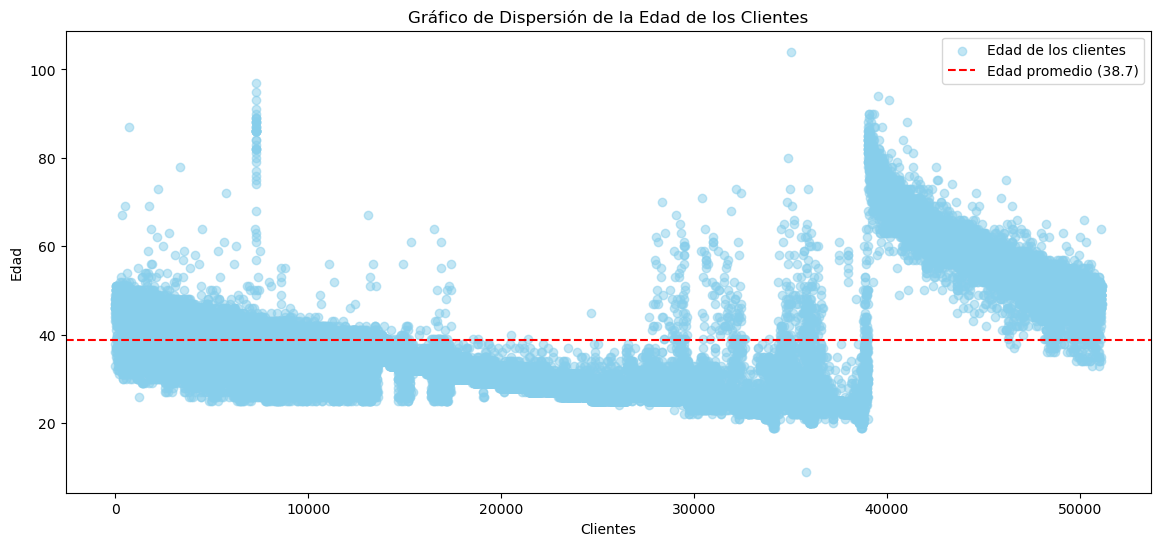

In [15]:
edades = dfC['Edad']
# Crear un gráfico de dispersión
plt.figure(figsize=(14, 6))
plt.scatter(np.arange(len(edades)), edades, alpha=0.5, color='skyblue', label="Edad de los clientes")

# Línea del promedio
plt.axhline(edad_promedio, color='red', linestyle='--', label=f'Edad promedio ({round(edad_promedio, 2)})')

plt.title('Gráfico de Dispersión de la Edad de los Clientes')
plt.xlabel('Clientes')
plt.ylabel('Edad')
plt.legend()

plt.show()


2.   Cuartiles del monto facturado en TC en el mes X

`Esto nos proporciona una idea clara de la distribuidos los datos y cómo varía el comportamiento de los clientes respecto al uso de sus tarjetas de crédito`



In [16]:
cuartil_25_montos_facturados = dfC['Fac_T12'].quantile(0.25)
cuartil_50_montos_facturados = dfC['Fac_T12'].quantile(0.50)
cuartil_75_montos_facturados = dfC['Fac_T12'].quantile(0.75)
cuartil_90_montos_facturados = dfC['Fac_T12'].quantile(0.90)

print(f"Cuartil 25 del monto facturado en TC: {cuartil_25_montos_facturados}")
print(f"Cuartil 50 del monto facturado en TC: {cuartil_50_montos_facturados}")
print(f"Cuartil 75 del monto facturado en TC: {cuartil_75_montos_facturados}")
print(f"percentil 90 del monto facturado en TC: {cuartil_90_montos_facturados}")


Cuartil 25 del monto facturado en TC: 0.0
Cuartil 50 del monto facturado en TC: 24720.0
Cuartil 75 del monto facturado en TC: 84941.0
percentil 90 del monto facturado en TC: 182434.00000000012


Estos datos nos indican que:

```
* El 25 % de los clientes facturo 0
* El 50 % de los clientes facturo menos de 24.720
* El 75 % de los clientes facturo menos de 84941
* Los clientes que están en el 10% superior facturan minimo 182.434 y podrian ser foco de estrategias como por ejemplo beneficios
```





3.   Mediana de la renta


```
  Esto nos ayuda a identificar el punto medio de los ingresos de los clientes y saber un ingreso menos sesgago a los valores extremos
  
```



In [17]:
mediana_renta = dfC['Renta'].median()

print(f"Mediana de la renta de los clientes: {mediana_renta}")

Mediana de la renta de los clientes: 567012.0




```
  Este resultado nos muestra que el 50 % de los clientes tiene una renta menor a 567.012
```





4. Extra - Promedio y Rango de la antiguedad


```
  El rango de la antigüedad del cliente permite observar la diferencia entre el cliente más antiguo y el más
  reciente tambien el tiempo que los clientes llevan con el banco
```





In [18]:
# Rango de la antigüedad de los clientes
antiguedad_promedio = np.trunc(dfC['Antiguedad'].mean()/12)
antiguedad_min = dfC['Antiguedad'].min()
antiguedad_max = dfC['Antiguedad'].max()
antiguedad_anios = np.trunc(antiguedad_max/12)

print(f"Antigüedad mínima: {antiguedad_min} meses")
print(f"Antigüedad máxima: {antiguedad_anios} años")
print(f"Antigüedad promedio: {antiguedad_promedio} años")

Antigüedad mínima: 6 meses
Antigüedad máxima: 27.0 años
Antigüedad promedio: 3.0 años


## ahora graficaremos las variables para conocer la distribucion de los datos

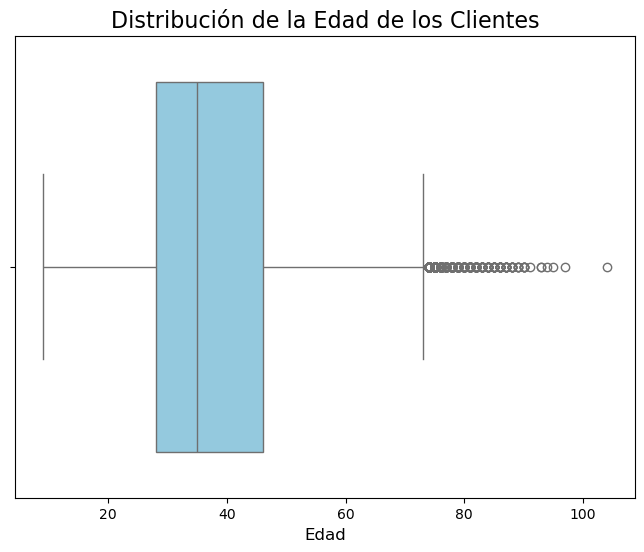

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dfC['Edad'], color='skyblue')

plt.title('Distribución de la Edad de los Clientes', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.show()

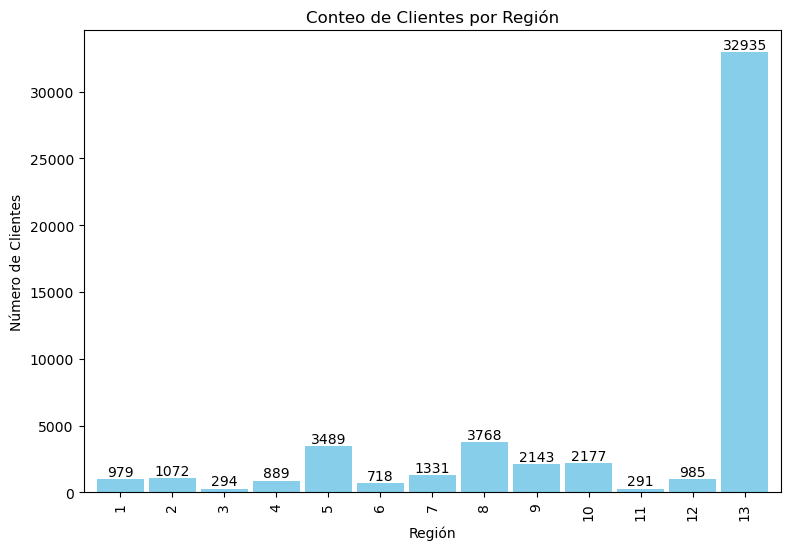

In [20]:
# visualizamos los datos de la variable

dfC['Region'].value_counts().sort_index().plot(kind='bar', figsize=(9, 6), sharey=True, width=0.9, color='skyblue')

plt.title('Conteo de Clientes por Región')
plt.xlabel('Región')
plt.ylabel('Número de Clientes')

# Agregar la cantidad de cada barra
for i, v in enumerate(hoja1['Region'].value_counts().sort_index()):
    plt.text(i, v + 3, str(v), color='black', ha='center', va='bottom')


plt.show()


`Este grafico nos permite conocer la cantidad de clientes segmentandolos por regiones, asi podremos aplicas estrategias`

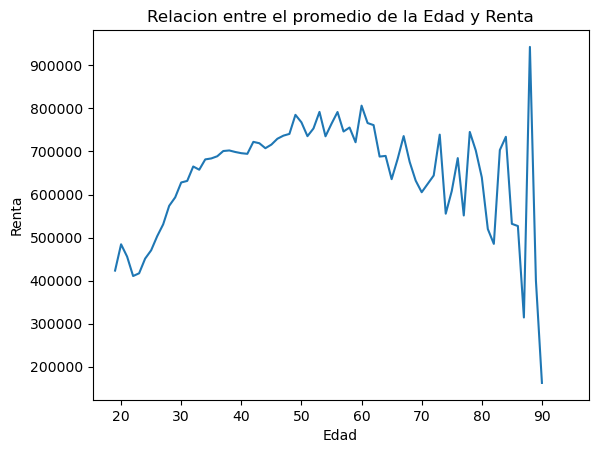

In [21]:
dfC.groupby('Edad')['Renta'].mean().plot()
plt.title('Relacion entre el promedio de la Edad y Renta')
plt.ylabel('Renta')

plt.show()

Como podemos ver el grafico hay una relacion directa entre la edad y la renta

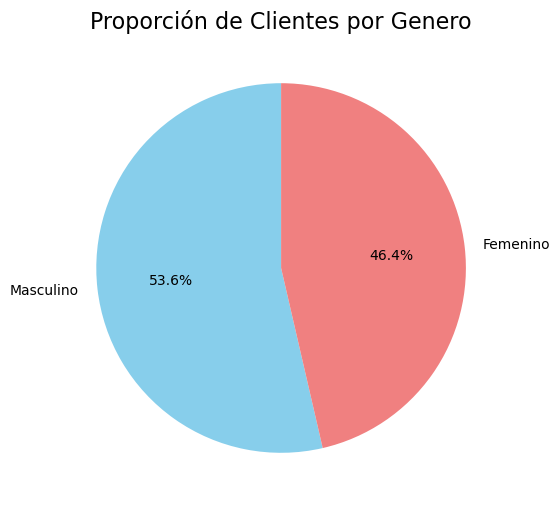

In [22]:
plt.figure(figsize=(6, 6))
dfC['Sexo'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Masculino', 'Femenino'], colors=['skyblue', 'lightcoral'], startangle=90, )

plt.title('Proporción de Clientes por Genero', fontsize=16)
plt.ylabel('')
plt.show()

In [23]:
# Mostrar tipos de datos originales
print("Tipos de datos originales:")
print(dfC.dtypes)

# Convertir columnas de tipo float a int (si aplica)
for columna in dfC.columns:
    if pd.api.types.is_float_dtype(dfC[columna]):
        dfC[columna] = dfC[columna].fillna(0).astype(int)  # Manejar NaN como 0 antes de la conversión

# Verificar tipos de datos después de la conversión
print("\nTipos de datos después de la conversión:")
print(dfC.dtypes)

Tipos de datos originales:
0
Region            object
Renta             object
Sexo              object
Subsegmento       object
Edad              object
Adicional         object
Antiguedad        object
CambioPin         object
Consumo           object
Debito            object
Ctacte            object
Cuentas           object
Hipotecario       object
Internauta        object
Monoproducto      object
TC                object
Dualidad          object
CUPO_L1           object
CUPO_MX           object
CUPO_L2           object
Col_T12           object
ColL1TE_T12       object
EeccInt_T12       object
EeccNac_T12       object
Fac_T12           object
FacAI_T12         object
FacAN_T12         object
FacCCOT_T12       object
FacCCPC_T12       object
FacCI_T12         object
FacCN_T12         object
FacCOL_T12        object
FacDebAtm_T12     object
FacDebCom_T12     object
FacPAT_T12        object
FlgAct_T12        object
FlgActAI_T12      object
FlgActAN_T12      object
FlgActCCOT_T12    obj

## Fase 3: Preparacion

Ahora hay que identificar la forma en que imputaremos los datos nulos de las variables que anteriormente estudiamos


```
# Primero contaremos los nulos de la variable region y los reemplazarsmos con la moda ya que son pocos nulos en esta variable
```






In [24]:
contar_nulos_region = dfC['Region'].isnull().sum()
contar_nulos_region

53

In [25]:
# Aca calculamos la moda de la variable region para rellenar los datos nulos
moda_region = dfC['Region'].mode()[0]
dfC['Region'].fillna(moda_region, inplace=True)

region = dfC['Region'].value_counts()
region.head()

C:\Users\sircr\AppData\Local\Temp\ipykernel_22100\3811569083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfC['Region'].fillna(moda_region, inplace=True)
C:\Users\sircr\AppData\Local\Temp\ipykernel_22100\3811569083.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfC['Region'].fillna(moda_region, inpl

Region
13    32988
8      3768
5      3489
10     2177
9      2143
Name: count, dtype: int64

In [26]:
# Cambiamos el tipo de dato de la variable edad
dfC['Region'] = dfC['Region'].astype('int')

C:\Users\sircr\AppData\Local\Temp\ipykernel_22100\2762301456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfC['Region'] = dfC['Region'].astype('int')



2.   Reemplazaremos los datos de la variable sexo ya que solo tienen un caracter por cada sexo llevando a la confucion en su lectura y asi mejoramos su correcta interpretacion



In [27]:
dfC['Sexo'] = hoja1['Sexo'].astype(str)
# Los nulos los reemplazamos por sexo masculino
dfC['Sexo'] = dfC['Sexo'].replace({'M': 0, 'H': 1, 'nan':1})
print(dfC['Sexo'].value_counts())


Sexo
1    27411
0    23713
Name: count, dtype: int64


C:\Users\sircr\AppData\Local\Temp\ipykernel_22100\3948397386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfC['Sexo'] = hoja1['Sexo'].astype(str)
C:\Users\sircr\AppData\Local\Temp\ipykernel_22100\3948397386.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfC['Sexo'] = dfC['Sexo'].replace({'M': 0, 'H': 1, 'nan':1})
C:\Users\sircr\AppData\Local\Temp\ipykernel_22100\3948397386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Listamos los valores de las variables para verificar la imputacionde nulos y el cambio en sus propiedadesy como podemos ver ya no hay datos nulos

In [28]:
set_region = set(dfC['Region'].to_list())
print(set_region)

set_sexo = set(dfC['Sexo'].to_list())
print(set_sexo)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
{0, 1}


Ahora estudiaremos la variable renta ya que es muy importante esta dato ya que nos permite conocer el poder adquisitivo de los clientes, es por esto que contaremos los nulos y verificaremos si es mejor eliminar los datos faltantes o rellenarlos


```
  Primero crearemos un grafico de caja para verificar si hay datos extremos dentro de nuestra variable
```



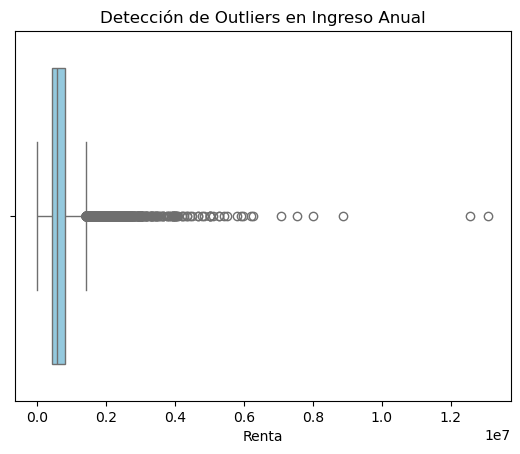

In [29]:
sns.boxplot(x=dfC['Renta'], color='skyblue')
# plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '')))
plt.title('Detección de Outliers en Ingreso Anual')
plt.show()

In [30]:
contar_nulos_renta = dfC['Renta'].isnull().sum()
contar_nulos_renta

13365

In [31]:
mediana_renta = dfC['Renta'].median()
mediana_renta

567012.0

In [32]:
renta_maxima = dfC['Renta'].max()
print(f'La renta maxima es {renta_maxima}')

renta_minima = dfC['Renta'].min()
print(f'La renta minima es {renta_minima}')

La renta maxima es 13089327
La renta minima es 1


ahora podemos observar los extremos de la renta


---




Como hemos visto lo mas conveniente en reemplazar los datos nulos de la renta con la mediana porque hay datos muy alejados entre ellos(valores atipicos)

In [33]:

dfC['Renta'].fillna(mediana_renta)


C:\Users\sircr\AppData\Local\Temp\ipykernel_22100\2796013896.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfC['Renta'].fillna(mediana_renta)


0        567012.0
1        143640.0
2        929106.0
3        172447.0
4        805250.0
           ...   
51119    364978.0
51120    625376.0
51121    806220.0
51122    567012.0
51123    840878.0
Name: Renta, Length: 51124, dtype: float64

ahora como hay datos que estan bastante alejados (datos extremos) los eliminaremos y tomaremos las rentas mas cercanas a la mediana

In [34]:
# Eliminar outliers fuera de un rango definido (por ejemplo, valores extremos en los ingresos anuales)
q1 = dfC['Renta'].quantile(0.25)
q3 = dfC['Renta'].quantile(0.75)
iqr = q3 - q1

# Filtrar los datos eliminando outliers
df_filtered = dfC[(dfC['Renta'] >= (q1 - 1.5 * iqr)) & (dfC['Renta'] <= (q3 + 1.5 * iqr))]
iqr


394904.5

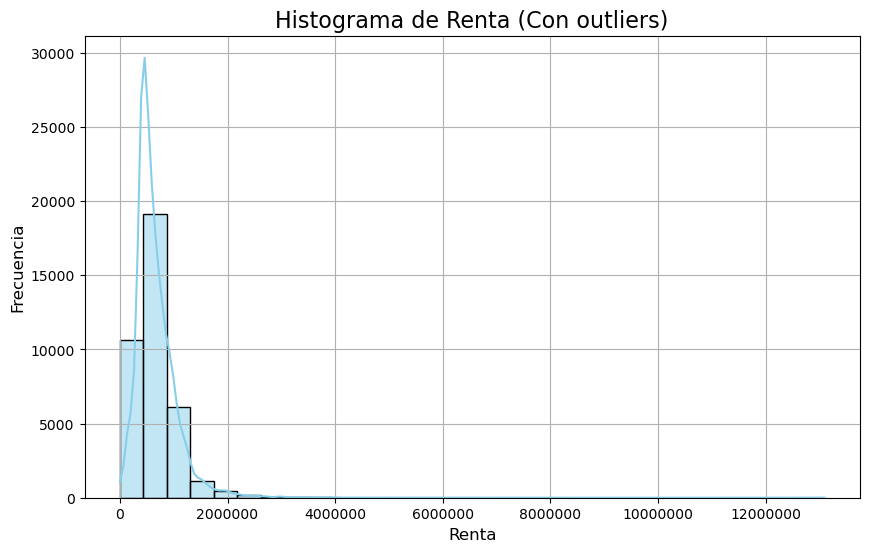

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(dfC['Renta'], bins=30, kde=True, color='skyblue')

plt.title('Histograma de Renta (Con outliers)', fontsize=16)
plt.xlabel('Renta', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Formatear los valores del eje X para mostrarlos sin notación científica
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '')))

plt.grid(True)
plt.show()

Como pudemos ver el anterior grafico muestra la distribucion de la renta la cual esta bien dispersa lo que hace dificil calcular o prececir comportamientos es por esto que tomamos los cuartiles mas cercanos a la media


---
Esto lo podemos apreciar con el siguiente grafico


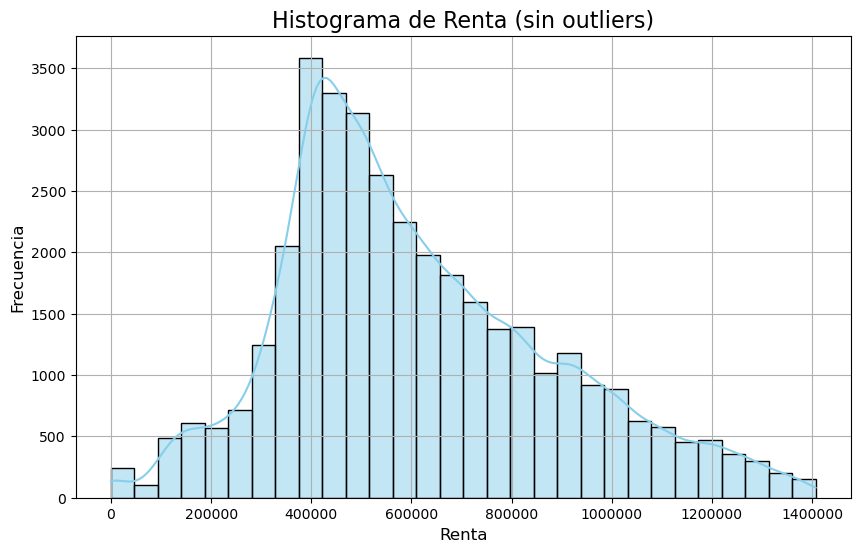

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Renta'], bins=30, kde=True, color='skyblue')

plt.title('Histograma de Renta (sin outliers)', fontsize=16)
plt.xlabel('Renta', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Formatear los valores del eje X para mostrarlos sin notación científica
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '')))

plt.grid(True)
plt.show()

Con esto la variable renta quedaria lista para crear un buen modelo a futuro

In [37]:
df_filtered['Renta'] = df_filtered['Renta'].astype('int')

C:\Users\sircr\AppData\Local\Temp\ipykernel_22100\1003152688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Renta'] = df_filtered['Renta'].astype('int')


In [38]:
df_filtered.head()

0  Region   Renta  Sexo Subsegmento Edad Adicional Antiguedad CambioPin  \
1      13  143640     1         160   46         0         69       NaN   
2      13  929106     1         170   45         1         24         1   
3      13  172447     1         151   46         1        134         1   
4      13  805250     1         170   46         1        116         1   
5      13  707664     1         170   47         1         67         1   

0 Consumo Debito  ... TxsCN_T12 TxsCOL_T12 TxsDebAtm_T12 TxsDebCom_T12  \
1       0      0  ...         1          0             0             0   
2       0      1  ...         3          0            16             5   
3       0      0  ...         3          0             0             0   
4       0      0  ...         6          0             0             0   
5       0      1  ...         2          0            28             2   

0 TxsPAT_T12 UsoL1_T12 UsoL2_T12 UsoLI_T12 IndRev_T12 target  
1          0    244876    284632         0          R      0  
2          0     94415         0         0          T      0  
3          0    358807     14660         0          R      0  
4          0     67516    234211         0          T      0  
5          0         0    165188         0          R      0  

[5 rows x 62 columns]

In [39]:
contar_nulos = df_filtered.isnull().sum()
indice = 0
for columna, nulos in contar_nulos.items():
    indice+=1
    print(f'{indice}-{columna}: {nulos}')
# Mostramos los datos de una mejor manera

1-Region: 0
2-Renta: 0
3-Sexo: 0
4-Subsegmento: 0
5-Edad: 0
6-Adicional: 0
7-Antiguedad: 0
8-CambioPin: 13750
9-Consumo: 0
10-Debito: 0
11-Ctacte: 0
12-Cuentas: 0
13-Hipotecario: 0
14-Internauta: 0
15-Monoproducto: 0
16-TC: 0
17-Dualidad: 0
18-CUPO_L1: 0
19-CUPO_MX: 0
20-CUPO_L2: 0
21-Col_T12: 5959
22-ColL1TE_T12: 5959
23-EeccInt_T12: 5959
24-EeccNac_T12: 5959
25-Fac_T12: 5959
26-FacAI_T12: 5959
27-FacAN_T12: 5959
28-FacCCOT_T12: 5959
29-FacCCPC_T12: 5959
30-FacCI_T12: 5959
31-FacCN_T12: 5959
32-FacCOL_T12: 5959
33-FacDebAtm_T12: 5959
34-FacDebCom_T12: 5959
35-FacPAT_T12: 5959
36-FlgAct_T12: 5959
37-FlgActAI_T12: 5959
38-FlgActAN_T12: 5959
39-FlgActCCOT_T12: 5959
40-FlgActCCPC_T12: 5959
41-FlgActCI_T12: 5959
42-FlgActCN_T12: 5959
43-FlgActCOL_T12: 5959
44-FlgActPAT_T12: 5959
45-PagoInt_T12: 5959
46-PagoNac_T12: 5959
47-Txs_T12: 5959
48-TxsAI_T12: 5959
49-TxsAN_T12: 5959
50-TxsCCOT_T12: 5959
51-TxsCCPC_T12: 5959
52-TxsCI_T12: 5959
53-TxsCN_T12: 5959
54-TxsCOL_T12: 5959
55-TxsDebAtm_T12:

In [40]:
columnas_con_nulos = [
    'Col_T12', 'ColL1TE_T12', 'EeccInt_T12', 'EeccNac_T12', 'Fac_T12',
    'FacAI_T12', 'FacAN_T12', 'FacCCOT_T12', 'FacCCPC_T12', 'FacCI_T12',
    'FacCN_T12', 'FacCOL_T12', 'FacDebAtm_T12', 'FacDebCom_T12', 'FacPAT_T12',
    'FlgAct_T12', 'FlgActAI_T12', 'FlgActAN_T12', 'FlgActCCOT_T12',
    'FlgActCCPC_T12', 'FlgActCI_T12', 'FlgActCN_T12', 'FlgActCOL_T12',
    'FlgActPAT_T12', 'PagoInt_T12', 'PagoNac_T12', 'Txs_T12', 'TxsAI_T12',
    'TxsAN_T12', 'TxsCCOT_T12', 'TxsCCPC_T12', 'TxsCI_T12', 'TxsCN_T12',
    'TxsCOL_T12', 'TxsDebAtm_T12', 'TxsDebCom_T12', 'TxsPAT_T12', 'UsoL1_T12',
    'UsoL2_T12', 'UsoLI_T12',
]

# eliminamos las columnas con nulos ya que erean pocan en comparacion con el total de datos
df_filtered = df_filtered.dropna(subset=columnas_con_nulos)

# Verificar que los datos nulos han sido eliminados
print("Datos después de eliminar nulos:")
print(df_filtered.isnull().sum())

# Guardar el DataFrame actualizado
df_filtered.to_excel("archivo_sin_nulos.xlsx", index=False)

Datos después de eliminar nulos:
0
Region                0
Renta                 0
Sexo                  0
Subsegmento           0
Edad                  0
Adicional             0
Antiguedad            0
CambioPin         11846
Consumo               0
Debito                0
Ctacte                0
Cuentas               0
Hipotecario           0
Internauta            0
Monoproducto          0
TC                    0
Dualidad              0
CUPO_L1               0
CUPO_MX               0
CUPO_L2               0
Col_T12               0
ColL1TE_T12           0
EeccInt_T12           0
EeccNac_T12           0
Fac_T12               0
FacAI_T12             0
FacAN_T12             0
FacCCOT_T12           0
FacCCPC_T12           0
FacCI_T12             0
FacCN_T12             0
FacCOL_T12            0
FacDebAtm_T12         0
FacDebCom_T12         0
FacPAT_T12            0
FlgAct_T12            0
FlgActAI_T12          0
FlgActAN_T12          0
FlgActCCOT_T12        0
FlgActCCPC_T12        0
FlgAc

In [179]:
df_filtered['CambioPin'] = df_filtered['CambioPin'].fillna(0)

# Verificar que los nulos han sido reemplazados
print("Datos nulos en 'CambioPin' después de la sustitución por 0:")
print(df_filtered['CambioPin'].isnull().sum())

Datos nulos en 'CambioPin' después de la sustitución por 0:
0


* Podemos ver que no apareció ningún dato nulo por ello nuestra data esta lista para el **proceso de Modelamiento**

* Pero como último paso verificaremos si aparecieron nuevos datos outliers.

In [180]:
df_filtered = df_filtered.drop(columns=['IndRev_T12'])

KeyError: "['IndRev_T12'] not found in axis"

In [187]:

df_filtered.describe()

0            Region         Renta          Sexo     CambioPin
count  30275.000000  3.027500e+04  30275.000000  30275.000000
mean      10.953493  6.191812e+05      0.541833      0.608720
std        3.337843  2.762501e+05      0.498255      0.488045
min        1.000000  1.000000e+00      0.000000      0.000000
25%        9.000000  4.225380e+05      0.000000      0.000000
50%       13.000000  5.670490e+05      1.000000      1.000000
75%       13.000000  7.975630e+05      1.000000      1.000000
max       13.000000  1.406830e+06      1.000000      1.000000

Como podemos ver se descarta el cliente con Edad 9 año y el Cliente con 104, ya que en Chile no se permite a menores de 18 años abrir una cuenta de crédito y por parte del cliente con Edad de 104 años lo consideramos un dato atípico, ya que no es relevante para nosotros y así la data queda mejor ajustada.

Por ultimo listamos los tipos de datos de nuestra data

In [188]:
df_numeric = df_filtered.apply(pd.to_numeric, errors='coerce')

# Convert all columns to integer data type
df_numeric = df_filtered.astype('int')

In [189]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30275 entries, 1 to 51123
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Region          30275 non-null  int32
 1   Renta           30275 non-null  int32
 2   Sexo            30275 non-null  int32
 3   Subsegmento     30275 non-null  int32
 4   Edad            30275 non-null  int32
 5   Adicional       30275 non-null  int32
 6   Antiguedad      30275 non-null  int32
 7   CambioPin       30275 non-null  int32
 8   Consumo         30275 non-null  int32
 9   Debito          30275 non-null  int32
 10  Ctacte          30275 non-null  int32
 11  Cuentas         30275 non-null  int32
 12  Hipotecario     30275 non-null  int32
 13  Internauta      30275 non-null  int32
 14  Monoproducto    30275 non-null  int32
 15  TC              30275 non-null  int32
 16  Dualidad        30275 non-null  int32
 17  CUPO_L1         30275 non-null  int32
 18  CUPO_MX         30275 non-null 

In [190]:
df_numeric.head()

0  Region   Renta  Sexo  Subsegmento  Edad  Adicional  Antiguedad  CambioPin  \
1      13  143640     1          160    46          0          69          0   
2      13  929106     1          170    45          1          24          1   
3      13  172447     1          151    46          1         134          1   
4      13  805250     1          170    46          1         116          1   
5      13  707664     1          170    47          1          67          1   

0  Consumo  Debito  ...  TxsCI_T12  TxsCN_T12  TxsCOL_T12  TxsDebAtm_T12  \
1        0       0  ...          0          1           0              0   
2        0       1  ...          0          3           0             16   
3        0       0  ...          0          3           0              0   
4        0       0  ...          0          6           0              0   
5        0       1  ...          0          2           0             28   

0  TxsDebCom_T12  TxsPAT_T12  UsoL1_T12  UsoL2_T12  UsoLI_T12  target  
1              0           0     244876     284632          0       0  
2              5           0      94415          0          0       0  
3              0           0     358807      14660          0       0  
4              0           0      67516     234211          0       0  
5              2           0          0     165188          0       0  

[5 rows x 61 columns]

# **Fase 4 modelo **


Objetivo:

Clasificar si un cliente es propenso a abandonar el banco, es decir, dejar de utilizar sus productos o cerrar cuentas.
Variable objetivo: sera la variable target, donde 0 significa que el cliente ha reducido el uso de sus productos o ha cerrado cuentas, y 1 que sigue siendo un cliente activo.

para esto analizaremos las mejores variables con SelectKBest con f_classif para seleccionar las 10 características que más influyen en la predicción de target.



Esta matriz nos permitira medir la relación entre las diferentes variables de de nuestro conjunto de datos

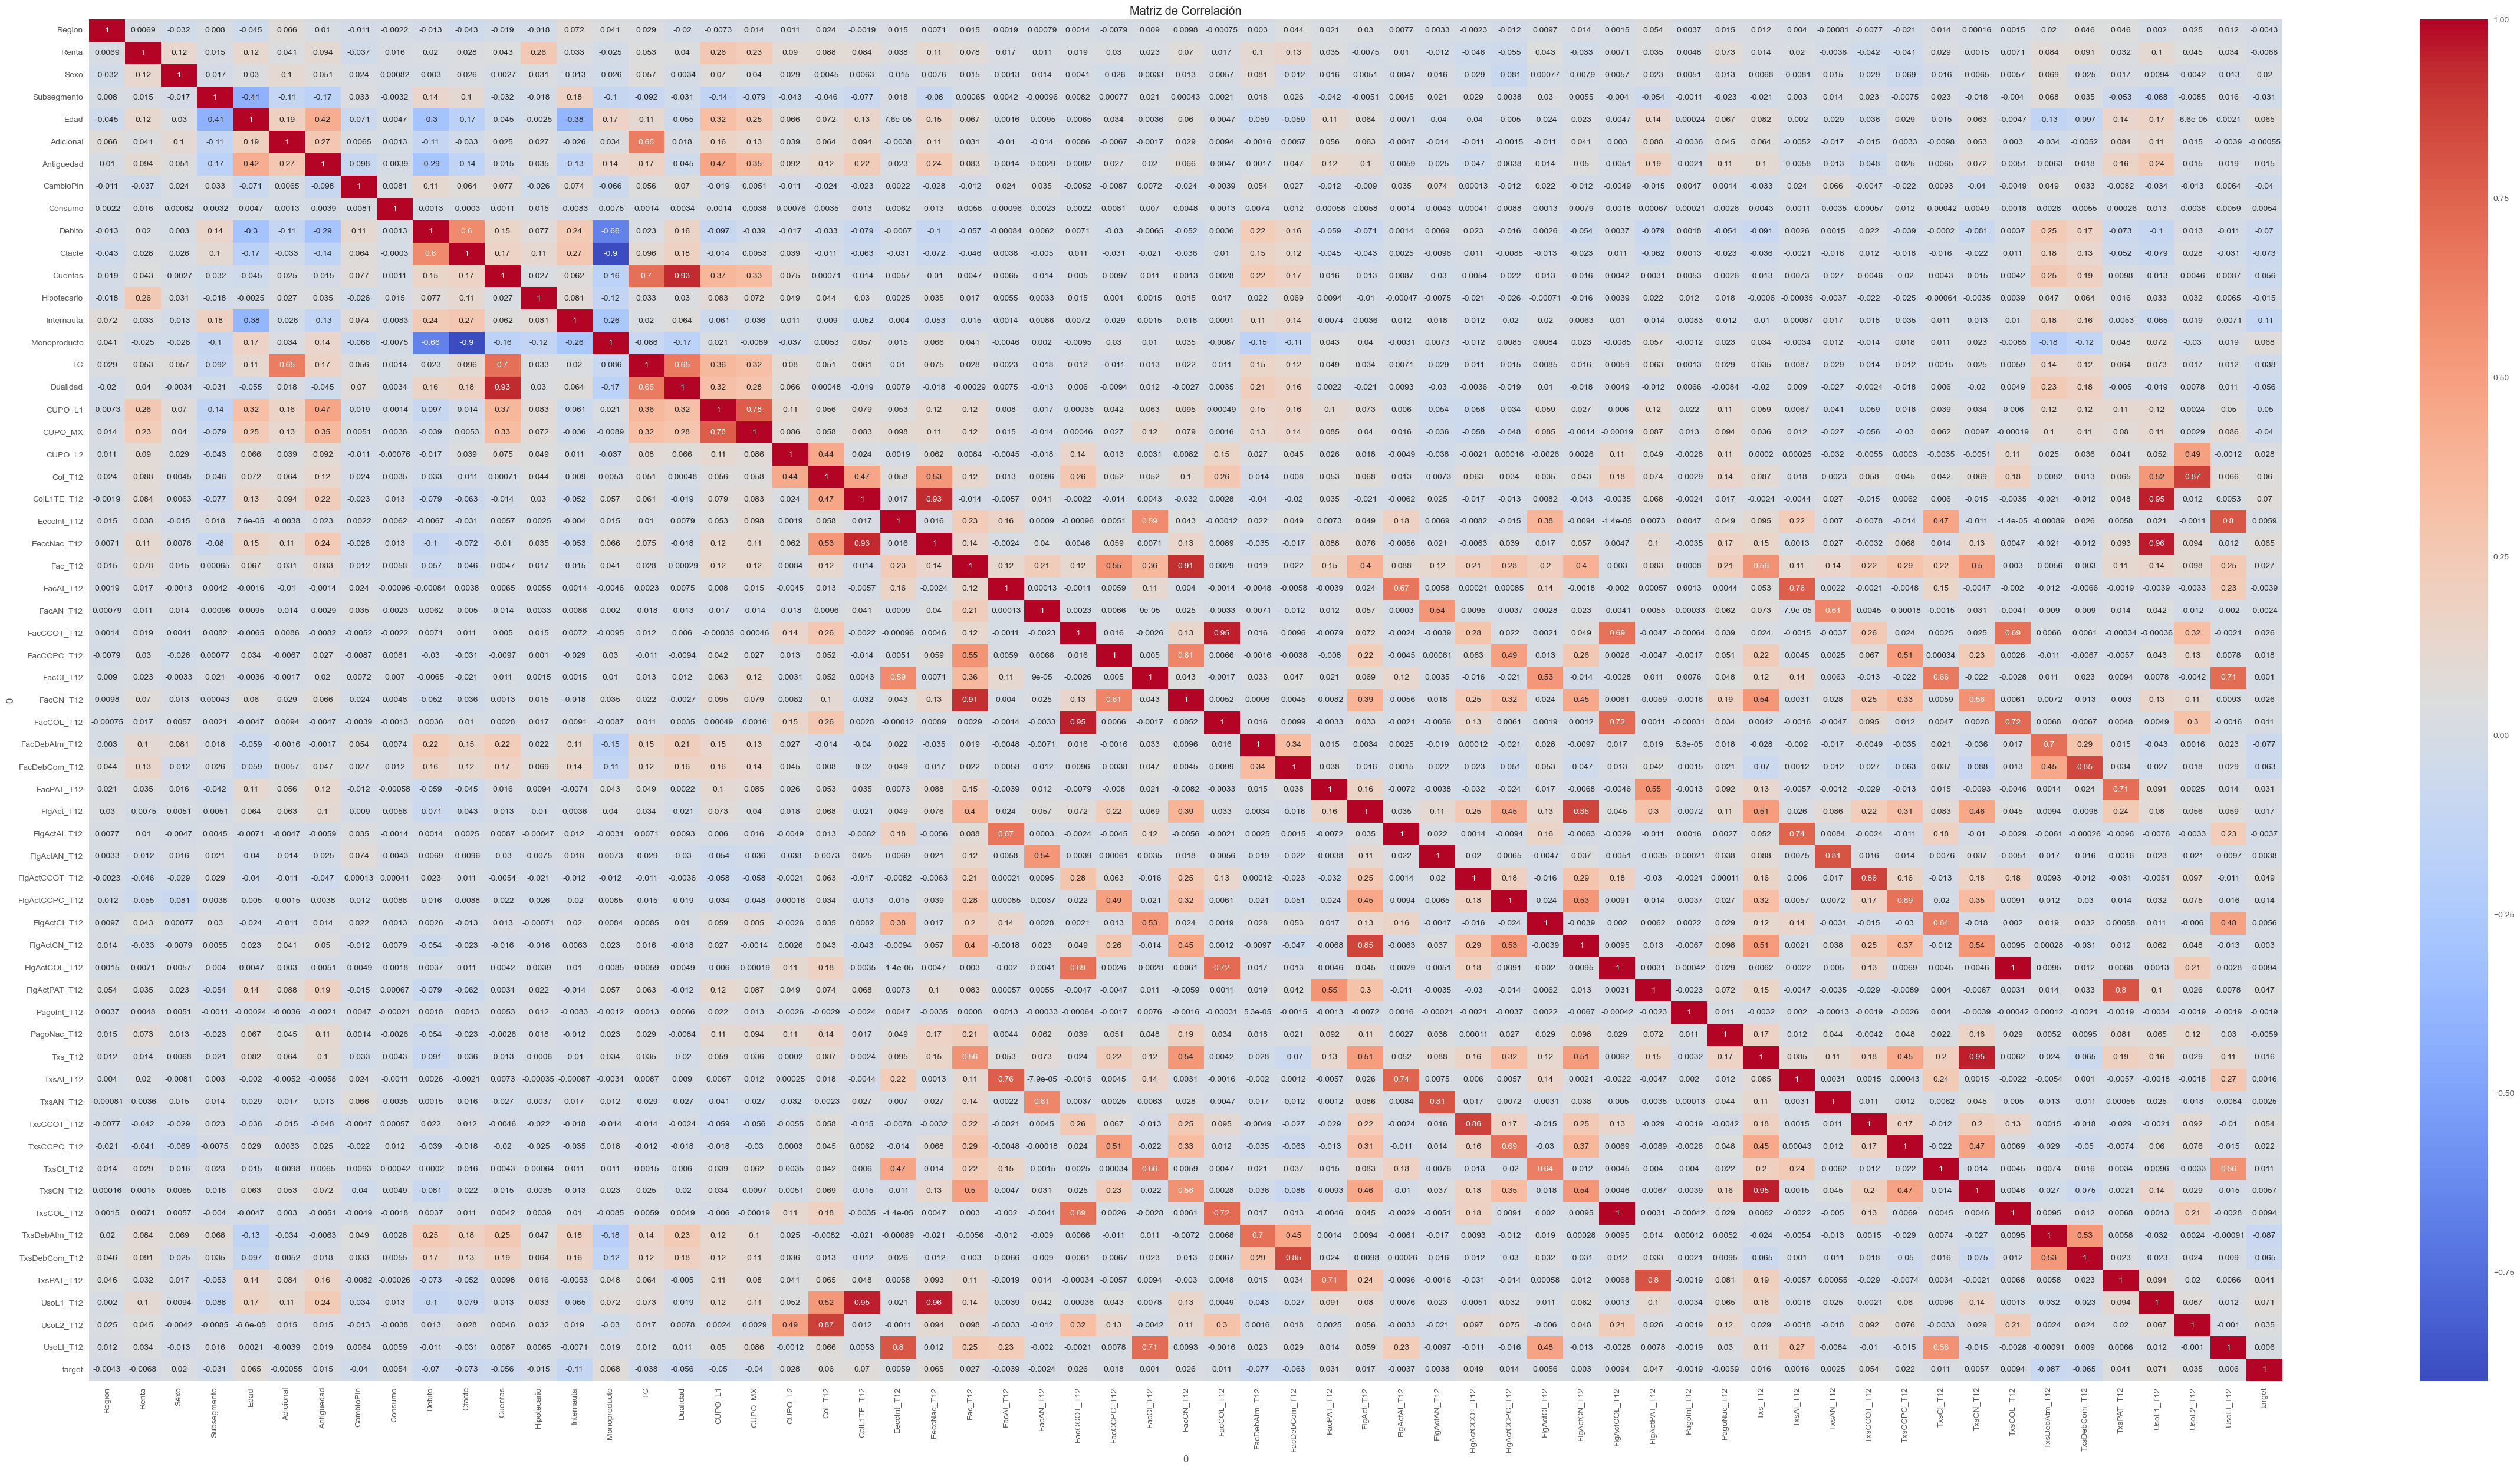

In [191]:
corr_matrix = df_numeric.corr()
plt.figure(figsize=(60, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

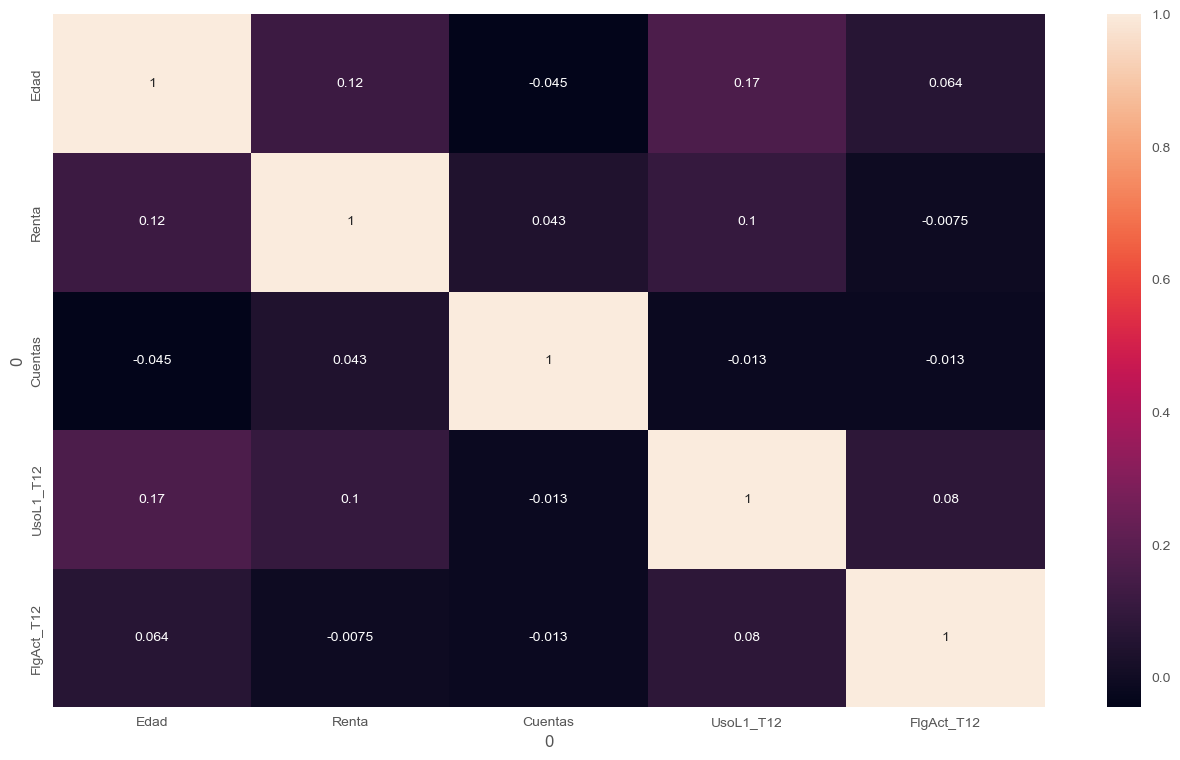

In [192]:
corr = df_numeric[['Edad', 'Renta', 'Cuentas', 'UsoL1_T12', 'FlgAct_T12']].corr()
sns.heatmap(corr, annot=True)
plt.show()

ahora vemos cuántos ejemplos hay de cada clase en la columna target, que es la variable que estamos tratando de predecir.

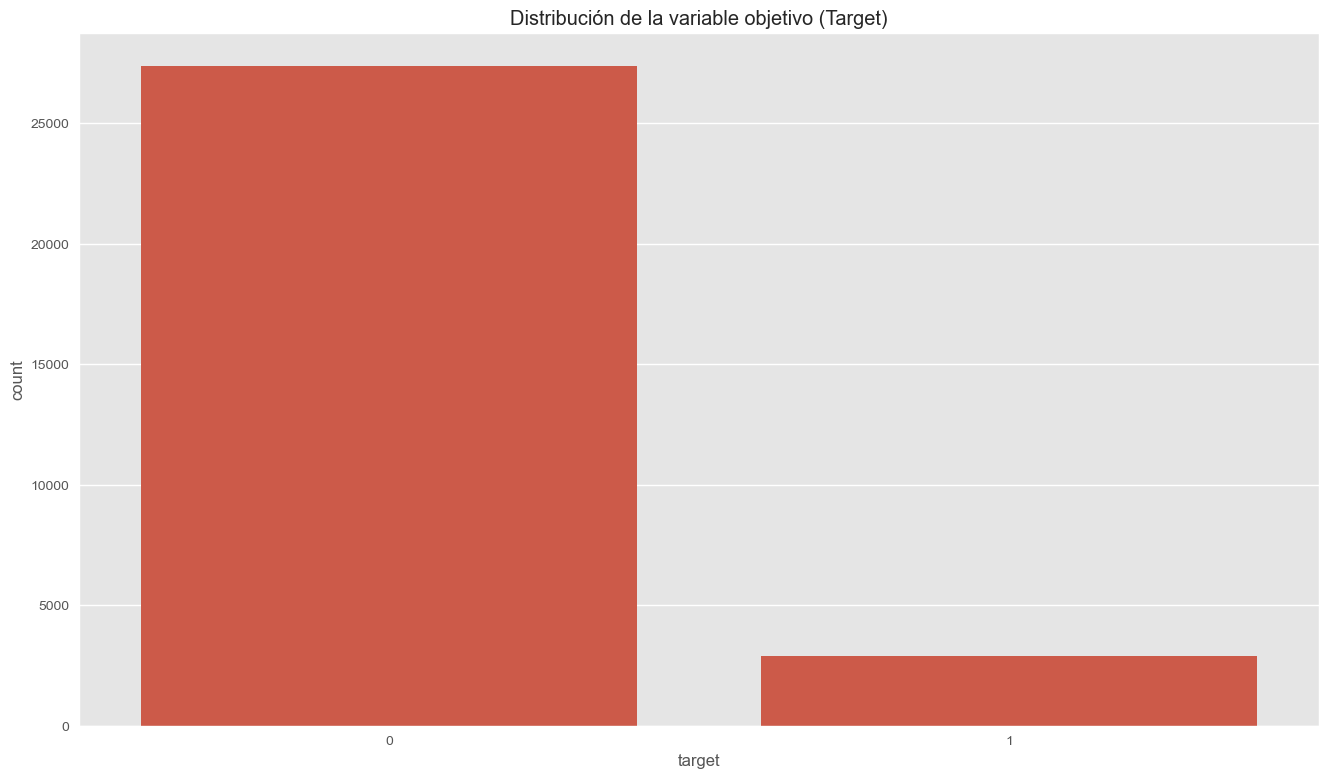

In [193]:
sns.countplot(x='target', data=df_numeric)
plt.title('Distribución de la variable objetivo (Target)')
plt.show()

In [194]:
count_class_0, count_class_1 = df_numeric['target'].value_counts()
print(f"Clase 0: {count_class_0}, Clase 1: {count_class_1}")

Clase 0: 27388, Clase 1: 2887


Si encontramos que las clases estaban desbalanceadas, usamos SMOTE para generar más ejemplos de la clase minoritaria.

¿Qué es SMOTE?: Es una técnica que genera ejemplos sintéticos de la clase minoritaria, para que haya una cantidad similar de ejemplos en ambas clases.

Pasos:
Dividimos el conjunto de datos en entrenamiento y prueba usando train_test_split. El 70% de los datos será usado para entrenar el modelo y el 30% para probarlo.

Aplicamos SMOTE solo al conjunto de entrenamiento (X_train) para balancear las clases.

Verificamos la distribución después de aplicar SMOTE para asegurarnos de que las clases ahora estén más equilibradas.

In [52]:
pip install imbalanced-learn

In [195]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Asignar X (características) e y (variable objetivo)
X = df_numeric.drop('target', axis=1)
y = df_numeric['target']

# Dividir los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases después de aplicar SMOTE
print(f"Distribución original de clases en y_train: {y_train.value_counts()}")
print(f"Distribución de clases después de SMOTE en y_train_res: {y_train_res.value_counts()}")

Distribución original de clases en y_train: target
0    19171
1     2021
Name: count, dtype: int64
Distribución de clases después de SMOTE en y_train_res: target
0    19171
1    19171
Name: count, dtype: int64


No todas las variables (características) del dataset son igualmente útiles para predecir el target. Por lo tanto, usamos la Selección de Características para quedarnos solo con las más importantes.

Usamos SelectKBest con f_classif (un método estadístico) para seleccionar las 10 características que más influyen en la predicción de target.

fit_transform selecciona esas características del conjunto de datos transformado (estandarizado).

¿Por qué es importante?: Tener muchas características irrelevantes puede hacer que los modelos se comporten mal. Seleccionando solo las más importantes, ayudamos a mejorar el rendimiento del modelo.

In [196]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)  # También escalamos el conjunto de prueba

# 5. Seleccionar características con SelectKBest
k = min(10, X_train_res_scaled.shape[1])  # Asegurarse de que k sea válido
selector = SelectKBest(score_func=f_classif, k=k)
X_train_res_selected = selector.fit_transform(X_train_res_scaled, y_train_res)
X_test_selected = selector.transform(X_test_scaled)

# 6. Verificar los resultados
print(f"Shape de X_train_res_selected: {X_train_res_selected.shape}")
print(f"Shape de X_test_selected: {X_test_selected.shape}")

Shape de X_train_res_selected: (38342, 10)
Shape de X_test_selected: (9083, 10)


Ahora que tenemos los datos listos, entrenamos varios modelos de clasificación: SVM, Árbol de Decisión y Regresión Logística.

Para cada modelo (SVM, Árbol de Decisión, Regresión Logística), llamamos a la función fit para entrenar el modelo con el conjunto de datos de entrenamiento.
¿Por qué varios modelos?: Queremos comparar el rendimiento de diferentes algoritmos de Machine Learning para ver cuál predice mejor la variable target.

In [197]:
# Importar librerías necesarias
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Preprocesamiento: Escalar los datos
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

# Seleccionar características
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_rescaled, y)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Entrenar modelos supervisados
# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Árbol de Decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Regresión Logística
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Evaluar el desempeño (opcional)
print("Modelos entrenados exitosamente.")



Modelos entrenados exitosamente.


In [198]:
# Mostrar los primeros 5 registros de las características del conjunto de entrenamiento
print("Características (X_train):")
print(X_train[:5])

# Mostrar los primeros 5 registros de las etiquetas del conjunto de entrenamiento
print("\nEtiquetas (y_train):")
print(y_train[:5])




Características (X_train):
[[ 0.30214681  0.37862764  0.27745367 -1.47574064 -0.25030694 -0.12557931
  -0.46882557 -0.01476142 -0.52480962  0.37005076]
 [-0.57671061  0.37862764  0.27745367  0.67762585 -0.25030694  1.66481086
  -0.65962987 -0.74222004 -0.52480962  1.33938044]
 [-1.35754985  0.37862764  0.27745367  0.67762585 -0.25030694 -0.23384245
  -0.29779908 -0.27281776 -0.52480962 -0.36183538]
 [ 0.05696044  0.37862764  0.27745367 -1.47574064 -0.25030694  1.80997743
  -0.65962987 -0.74222004 -0.52480962  1.56347373]
 [ 2.27844016  0.37862764  0.27745367 -1.47574064 -0.25030694 -0.41875688
  -0.05741797 -0.37849073 -0.52480962 -0.1172853 ]]

Etiquetas (y_train):
3835     0
51189    1
51706    1
30135    0
36619    1
Name: target, dtype: int32


# **Fase 5 evaluacion**

Ahora vamos a evaluar qué tan bien predice cada modelo la variable target en el conjunto de prueba.

Métricas:
* Accuracy: La proporción de predicciones correctas.
* Precision: La proporción de predicciones positivas correctas.
* Recall: Qué tan bien el modelo encuentra todas las verdaderas positivas.
* F1 Score: Un balance entre Precision y Recall.
* ROC AUC: Indica qué tan bien el modelo puede diferenciar entre las clases (valores cercanos a 1 son mejores).

¿Por qué usar varias métricas?: Algunas métricas son más útiles que otras en casos donde las clases están desbalanceadas (por ejemplo, F1 y ROC AUC son mejores cuando el balance es desigual).

In [199]:
# Importar métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Definir función de evaluación
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    y_pred = modelo.predict(X_test)
    print(f"Evaluación para {nombre_modelo}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.2f}")
    print("\n")

# Evaluar SVM
evaluar_modelo(svm_model, X_test, y_test, "SVM")

# Evaluar Árbol de Decisión
evaluar_modelo(tree_model, X_test, y_test, "Árbol de Decisión")

# Evaluar Regresión Logística
evaluar_modelo(logreg_model, X_test, y_test, "Regresión Logística")

Evaluación para SVM:
Accuracy: 0.59
Precision: 0.62
Recall: 0.47
F1 Score: 0.54
ROC AUC: 0.59


Evaluación para Árbol de Decisión:
Accuracy: 0.83
Precision: 0.83
Recall: 0.85
F1 Score: 0.84
ROC AUC: 0.83


Evaluación para Regresión Logística:
Accuracy: 0.62
Precision: 0.64
Recall: 0.55
F1 Score: 0.59
ROC AUC: 0.62




Comparación de los tres modelos:

SVM (Máquinas de Soporte Vectorial):

* Este modelo está bastante bien, pero le cuesta un poco identificar correctamente los positivos (recall bajo).

Árbol de Decisión:

* Este modelo parece el mejor, ya que tiene los valores más altos en todas las métricas. Encuentra la mayoría de los positivos (recall) y además pocas veces se equivoca (precision).

Regresión Logística:

* Este modelo está bastante bien, mejor que SVM, pero no tanto como el Árbol de Decisión.

¿Cuál es el mejor?

El Árbol de Decisión parece ser el mejor modelo en este caso. Tiene la mayor accuracy (85%), la mejor precision (88%) y un excelente recall (81%), lo que significa que identifica correctamente la mayoría de los positivos y casi nunca se equivoca. Además, su ROC AUC de 0.85 muestra que distingue claramente entre las dos clases.



La Curva ROC nos muestra gráficamente la relación entre la tasa de falsos positivos y la tasa de verdaderos positivos.

¿Por qué es importante?: Nos ayuda a visualizar el rendimiento del modelo en diferentes umbrales de decisión. Un modelo perfecto tendría una curva que pasa por la esquina superior izquierda.

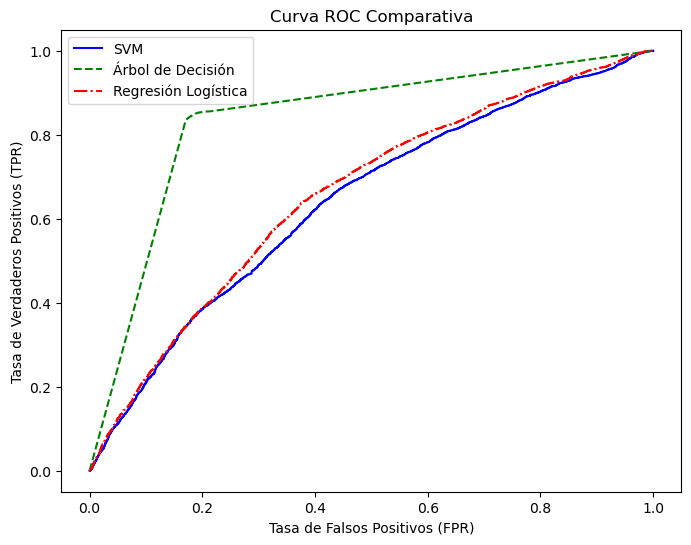

In [58]:
# Curva ROC para el modelo SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_model.decision_function(X_test))

# Curva ROC para el Árbol de Decisión
y_score_tree = tree_model.predict_proba(X_test)[:, 1]  # predict_proba da las probabilidades para cada clase
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_score_tree)

# Curva ROC para la Regresión Logística
y_score_logreg = logreg_model.decision_function(X_test)
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_score_logreg)

# Graficar las curvas ROC para los tres modelos
plt.figure(figsize=(8, 6))

# Curva ROC para SVM
plt.plot(fpr_svm, tpr_svm, label="SVM", linestyle='-', color='blue')

# Curva ROC para Árbol de Decisión
plt.plot(fpr_tree, tpr_tree, label="Árbol de Decisión", linestyle='--', color='green')

# Curva ROC para Regresión Logística
plt.plot(fpr_logreg, tpr_logreg, label="Regresión Logística", linestyle='-.', color='red')

# Etiquetas y título
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC Comparativa")
plt.legend()

# Mostrar gráfico
plt.show()


En resumen, el Árbol de Decisión no solo es más preciso, sino que también encuentra la mayoría de los ejemplos correctos, por lo que sería nuestra mejor opción.

## **APRENDIZAJE NO SUPERVISADO**

El objetivo es segmentar a los clientes de una empresa utilizando datos relacionados con su edad y antigüedad como clientes. Estos dos factores son clave para identificar patrones en su comportamiento, lo que puede ayudar a definir estrategias de marketing y atención personalizada.

Se busca determinar agrupaciones naturales (clusters) que revelen segmentos relevantes de clientes. Esto permitirá optimizar recursos en campañas dirigidas según las características de los segmentos encontrados.

primero haremos una copia de nuestros datos para trabajar en nuestro modelo

In [200]:
df_modelo = df_numeric
df_modelo.dtypes

0
Region            int32
Renta             int32
Sexo              int32
Subsegmento       int32
Edad              int32
Adicional         int32
Antiguedad        int32
CambioPin         int32
Consumo           int32
Debito            int32
Ctacte            int32
Cuentas           int32
Hipotecario       int32
Internauta        int32
Monoproducto      int32
TC                int32
Dualidad          int32
CUPO_L1           int32
CUPO_MX           int32
CUPO_L2           int32
Col_T12           int32
ColL1TE_T12       int32
EeccInt_T12       int32
EeccNac_T12       int32
Fac_T12           int32
FacAI_T12         int32
FacAN_T12         int32
FacCCOT_T12       int32
FacCCPC_T12       int32
FacCI_T12         int32
FacCN_T12         int32
FacCOL_T12        int32
FacDebAtm_T12     int32
FacDebCom_T12     int32
FacPAT_T12        int32
FlgAct_T12        int32
FlgActAI_T12      int32
FlgActAN_T12      int32
FlgActCCOT_T12    int32
FlgActCCPC_T12    int32
FlgActCI_T12      int32
FlgActCN_T12  

In [201]:
df_modelo.head()

0  Region   Renta  Sexo  Subsegmento  Edad  Adicional  Antiguedad  CambioPin  \
1      13  143640     1          160    46          0          69          0   
2      13  929106     1          170    45          1          24          1   
3      13  172447     1          151    46          1         134          1   
4      13  805250     1          170    46          1         116          1   
5      13  707664     1          170    47          1          67          1   

0  Consumo  Debito  ...  TxsCI_T12  TxsCN_T12  TxsCOL_T12  TxsDebAtm_T12  \
1        0       0  ...          0          1           0              0   
2        0       1  ...          0          3           0             16   
3        0       0  ...          0          3           0              0   
4        0       0  ...          0          6           0              0   
5        0       1  ...          0          2           0             28   

0  TxsDebCom_T12  TxsPAT_T12  UsoL1_T12  UsoL2_T12  UsoLI_T12  target  
1              0           0     244876     284632          0       0  
2              5           0      94415          0          0       0  
3              0           0     358807      14660          0       0  
4              0           0      67516     234211          0       0  
5              2           0          0     165188          0       0  

[5 rows x 61 columns]

Ahora para poder seleccionar nuestros datos realizaremos la correlación de estos para así seleccionar cuál será nuestro dato dependiente 
y cuáles serán los datos independientes.

ocuparemos un mapa de calor para ver la correlacion de la variables

In [202]:
import numpy as np
from scipy.stats import pearsonr

# Calcular correlación
coef, p_value = pearsonr(df_modelo['Edad'], df_modelo['Antiguedad'])
print(f"Coeficiente de Correlación: {coef:.4f}")
print(f"P-Value: {p_value:.4f}")


Coeficiente de Correlación: 0.4246
P-Value: 0.0000


0               Region     Renta      Sexo  Subsegmento      Edad  Adicional  \
0                                                                              
Region        1.000000  0.006857 -0.031661     0.008003 -0.045391   0.066354   
Renta         0.006857  1.000000  0.123371     0.014582  0.118660   0.041042   
Sexo         -0.031661  0.123371  1.000000    -0.017207  0.030459   0.101316   
Subsegmento   0.008003  0.014582 -0.017207     1.000000 -0.411390  -0.107153   
Edad         -0.045391  0.118660  0.030459    -0.411390  1.000000   0.194333   
Adicional     0.066354  0.041042  0.101316    -0.107153  0.194333   1.000000   
Antiguedad    0.010471  0.093645  0.050626    -0.165680  0.424595   0.267589   
Consumo      -0.002236  0.015740  0.000823    -0.003172  0.004686   0.001347   
Debito       -0.012717  0.019527  0.002963     0.141801 -0.297820  -0.110387   
Ctacte       -0.042509  0.028495  0.026383     0.102838 -0.173592  -0.033106   
Cuentas      -0.018521  0.042614 -0.002685    -0.032091 -0.044665   0.024870   
Hipotecario  -0.018038  0.255793  0.030512    -0.018179 -0.002482   0.027327   
Internauta    0.071769  0.033428 -0.012984     0.179175 -0.382571  -0.026291   
Monoproducto  0.040837 -0.024927 -0.026223    -0.099868  0.173561   0.033905   
TC            0.029272  0.052622  0.057069    -0.091916  0.108971   0.647929   
Dualidad     -0.019807  0.039986 -0.003433    -0.030586 -0.054644   0.017847   
CUPO_L1      -0.007255  0.258411  0.069511    -0.135493  0.319916   0.161768   
CUPO_MX       0.013936  0.226027  0.040419    -0.079358  0.249358   0.128764   
CUPO_L2       0.011147  0.090176  0.028519    -0.043161  0.065641   0.038509   

0             Antiguedad   Consumo    Debito    Ctacte   Cuentas  Hipotecario  \
0                                                                               
Region          0.010471 -0.002236 -0.012717 -0.042509 -0.018521    -0.018038   
Renta           0.093645  0.015740  0.019527  0.028495  0.042614     0.255793   
Sexo            0.050626  0.000823  0.002963  0.026383 -0.002685     0.030512   
Subsegmento    -0.165680 -0.003172  0.141801  0.102838 -0.032091    -0.018179   
Edad            0.424595  0.004686 -0.297820 -0.173592 -0.044665    -0.002482   
Adicional       0.267589  0.001347 -0.110387 -0.033106  0.024870     0.027327   
Antiguedad      1.000000 -0.003941 -0.290707 -0.144017 -0.015257     0.035150   
Consumo        -0.003941  1.000000  0.001288 -0.000301  0.001067     0.015058   
Debito         -0.290707  0.001288  1.000000  0.598052  0.151414     0.077122   
Ctacte         -0.144017 -0.000301  0.598052  1.000000  0.172273     0.112211   
Cuentas        -0.015257  0.001067  0.151414  0.172273  1.000000     0.026623   
Hipotecario     0.035150  0.015058  0.077122  0.112211  0.026623     1.000000   
Internauta     -0.125814 -0.008348  0.236149  0.270576  0.061907     0.081124   
Monoproducto    0.139698 -0.007478 -0.661090 -0.902158 -0.159465    -0.116361   
TC              0.174988  0.001423  0.023496  0.095861  0.700663     0.032592   
Dualidad       -0.045445  0.003373  0.157717  0.177662  0.931310     0.029521   
CUPO_L1         0.470149 -0.001405 -0.096850 -0.014029  0.368871     0.082566   
CUPO_MX         0.354613  0.003844 -0.039094  0.005289  0.331588     0.071557   
CUPO_L2         0.092156 -0.000764 -0.017300  0.039324  0.075173     0.049019   

0             Internauta  Monoproducto        TC  Dualidad   CUPO_L1  \
0                                                                      
Region          0.071769      0.040837  0.029272 -0.019807 -0.007255   
Renta           0.033428     -0.024927  0.052622  0.039986  0.258411   
Sexo           -0.012984     -0.026223  0.057069 -0.003433  0.069511   
Subsegmento     0.179175     -0.099868 -0.091916 -0.030586 -0.135493   
Edad           -0.382571      0.173561  0.108971 -0.054644  0.319916   
Adicional      -0.026291      0.033905  0.647929  0.017847  0.161768   
Antiguedad     -0.125814      0.139698  0

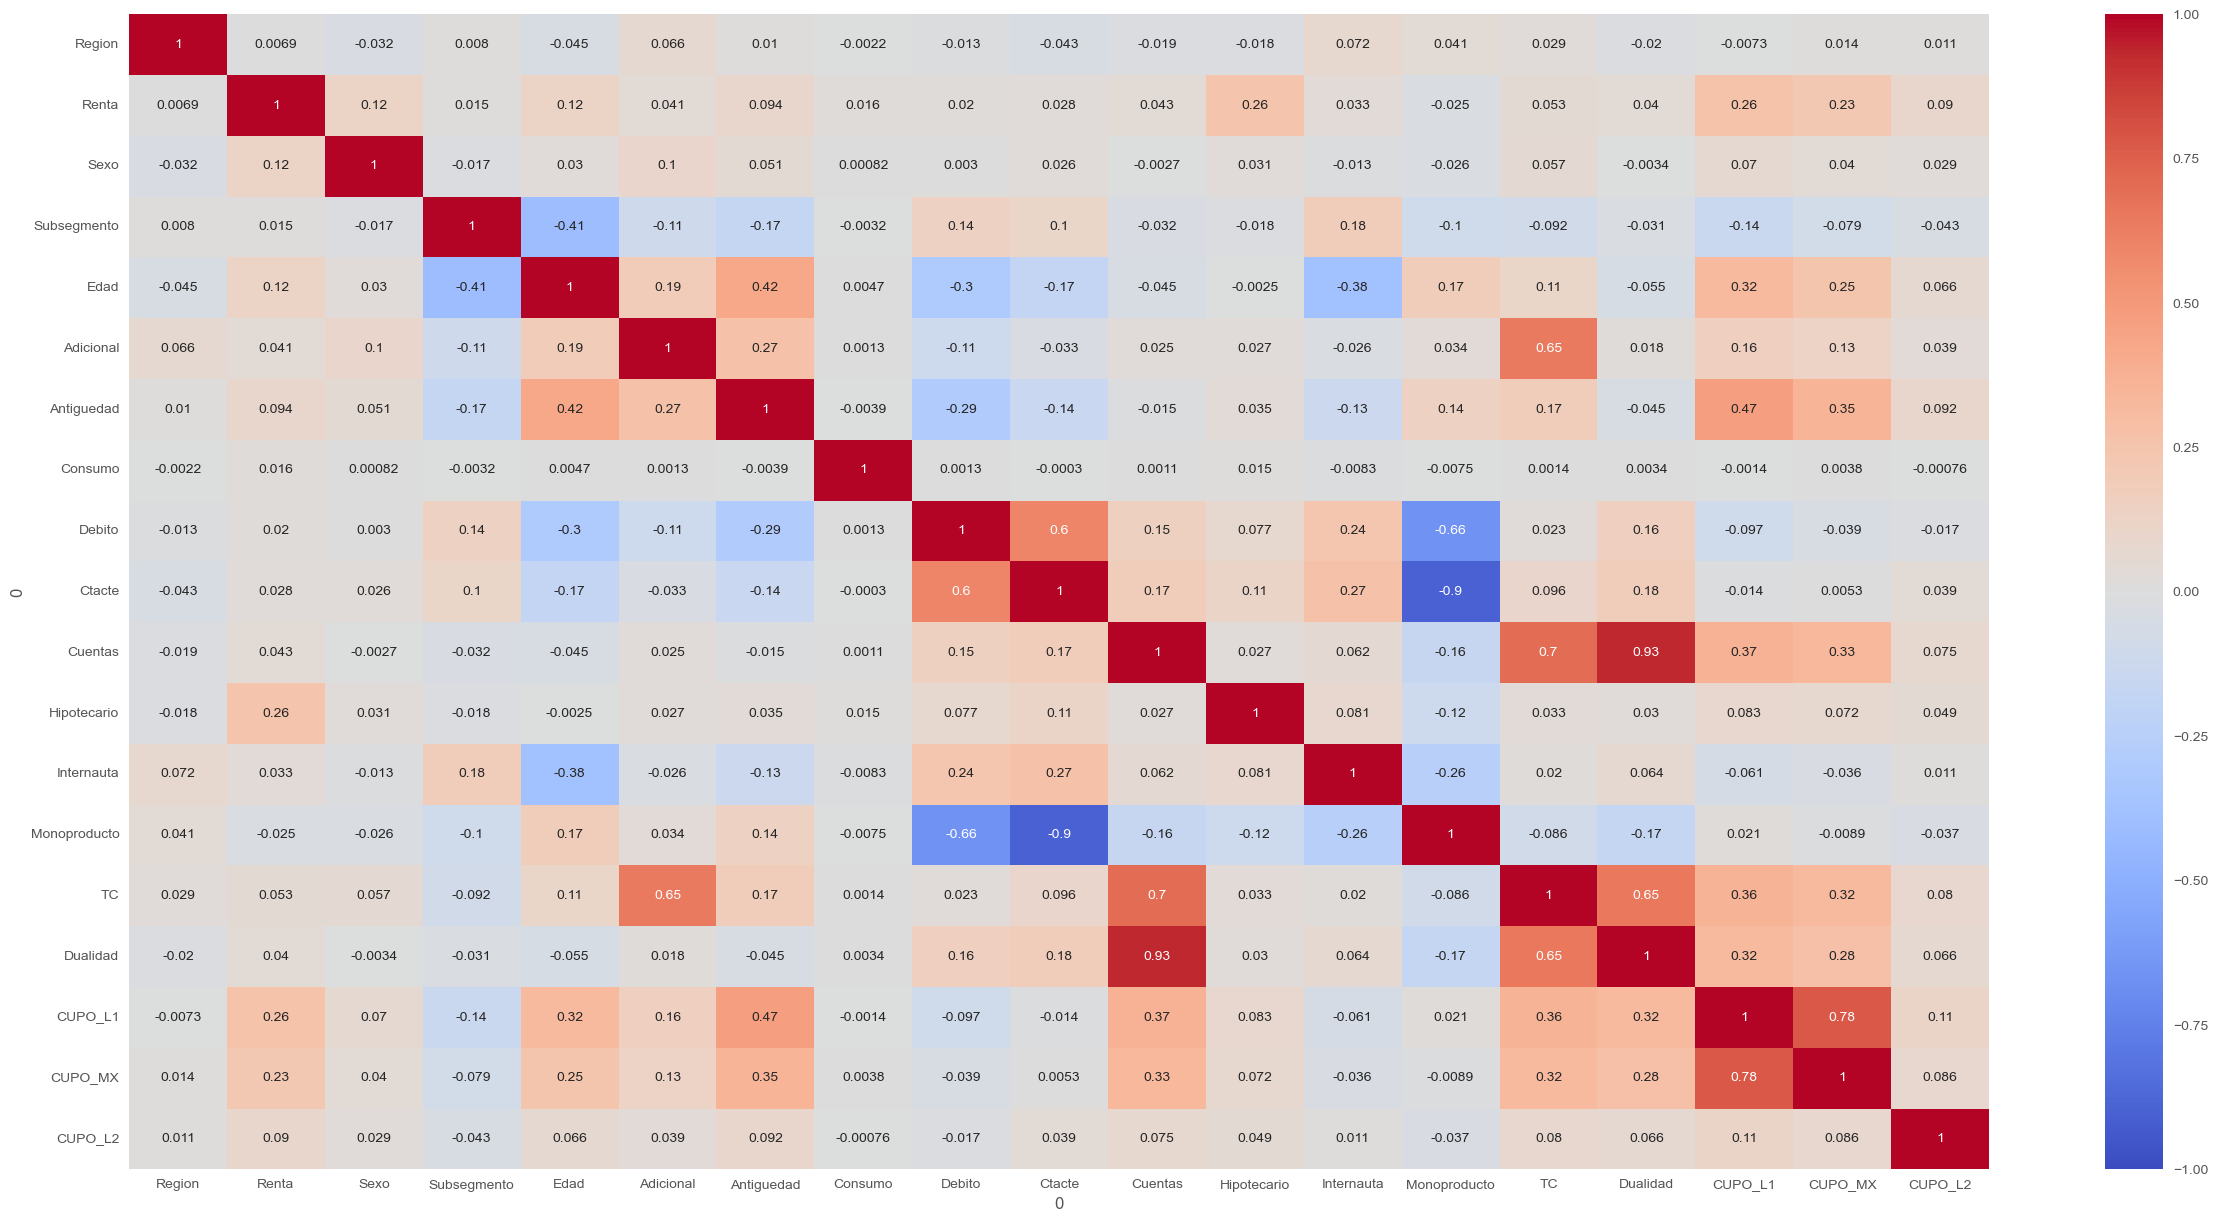

In [203]:
dfcorr1 = df_modelo.drop("CambioPin",axis=1)
dfcorr = dfcorr1.loc[:,'Region':'CUPO_L2'].corr()
plt.figure(figsize=(30, 15))
sns.heatmap(dfcorr, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
dfcorr

Observaciones iniciales:

* El gráfico muestra una posible tendencia entre la antigüedad y la edad, aunque no es completamente lineal.
* La correlación entre las variables será clave para justificar su uso en el modelo.

### **K-Means Clustering**

Para comenzar con nuestro modelo no supervisado de K-Means 
* seleccionaremos las variables **Edad** y **Antiguedad** para saber si la respectiva edad infiere directamente con la antigüedad de los clientes.

* listamos los datos y la relacion que hay entre la edad y la antiguedad
* realizamos un resumen estadistico de las variables escogidas

0              Edad    Antiguedad
count  30275.000000  30275.000000
mean      40.303055     41.764822
std       12.235793     33.037267
min       19.000000      6.000000
25%       31.000000     19.000000
50%       37.000000     30.000000
75%       48.000000     56.000000
max       94.000000    312.000000


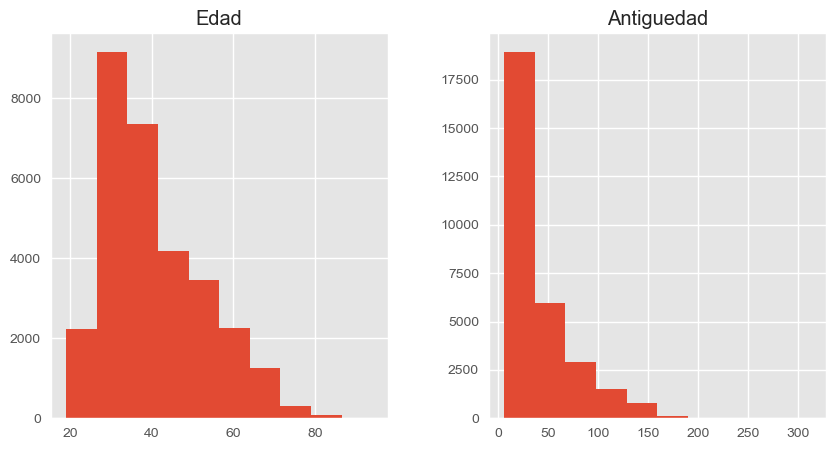

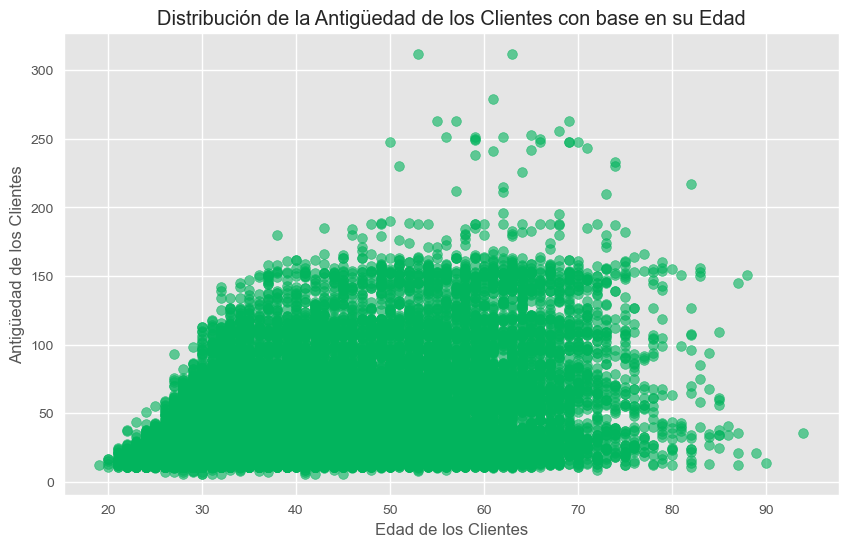

In [204]:
# Resumen estadístico
print(df_modelo[['Edad', 'Antiguedad']].describe())
df_modelo[['Edad', 'Antiguedad']].hist(figsize=(10, 5))
plt.show()

# Gráfico de dispersión inicial
plt.figure(figsize=(10, 6))
plt.scatter(df_modelo['Edad'], df_modelo['Antiguedad'], alpha=0.6, color='#02b45d')
plt.xlabel("Edad de los Clientes")
plt.ylabel("Antigüedad de los Clientes")
plt.title("Distribución de la Antigüedad de los Clientes con base en su Edad")
plt.show()


Para comenzar con nuestro proceso de K-Means Clusteriing le asignaremos el 50% de los datos, pero con registro al azar para que cada vez que se ejecute trate de mostrar diferentes datos enfocados a los propios centroides y el modelo logre mejorar

In [205]:
dfR = dfC.sample(frac = 0.5)
dfR['index'] = dfR.index
dfR

0      Region     Renta  Sexo  Subsegmento  Edad  Adicional  Antiguedad  \
50151       5  669560.0     1          170    52          0          26   
18093      13  664000.0     1          170    32          0           6   
25550      13       NaN     0          220    26          1          30   
22991      13  821284.0     1          220    31          1          12   
11481      13  420896.0     1          160    38          0          26   
...       ...       ...   ...          ...   ...        ...         ...   
37090      13       NaN     1          811    25          1          25   
18484      13  300098.0     1          220    31          1          32   
42871       6  703918.0     1          170    61          1         142   
21407      13  500694.0     1          160    32          0          11   
7384       11  477263.0     0          160    42          0           8   

0      CambioPin  Consumo  Debito  ...  TxsCOL_T12  TxsDebAtm_T12  \
50151        1.0        0       1  ...         0.0            2.0   
18093        1.0        0       1  ...         NaN            NaN   
25550        NaN        0       1  ...         0.0           14.0   
22991        1.0        0       1  ...         0.0            6.0   
11481        NaN        0       1  ...         0.0            6.0   
...          ...      ...     ...  ...         ...            ...   
37090        NaN        0       1  ...         0.0            0.0   
18484        1.0        0       1  ...         0.0            1.0   
42871        NaN        0       1  ...         0.0            0.0   
21407        1.0        0       1  ...         0.0           24.0   
7384         1.0        0       1  ...         NaN            NaN   

0      TxsDebCom_T12  TxsPAT_T12  UsoL1_T12  UsoL2_T12  UsoLI_T12  IndRev_T12  \
50151            1.0         0.0    67386.0   355659.0       0.00         NaN   
18093            NaN         NaN        NaN        NaN        NaN         NaN   
25550           10.0         0.0     4113.0        0.0       0.00         NaN   
22991            0.0         0.0     9156.0        0.0       0.00         NaN   
11481            0.0         0.0    34232.0        0.0       0.00         NaN   
...              ...         ...        ...        ...        ...         ...   
37090            0.0         0.0    53091.0        0.0       0.00         NaN   
18484            0.0         3.0   274997.0    37527.0      -0.04         NaN   
42871            0.0         0.0    68723.0    11749.0       0.00         NaN   
21407           12.0         4.0    82017.0    73519.0       0.00         NaN   
7384             NaN         NaN        NaN        NaN        NaN         NaN   

0      target  index  
50151       0  50151  
18093       0  18093  
25550       1  25550  
22991       0  22991  
11481       0  11481  
...       ...    ...  
37090       0  37090  
18484       0  18484  
42871       1  42871  
21407       0  21407  
7384        0   7384  

[25562 rows x 63 columns]

In [206]:
# Selección de una muestra aleatoria del 50%
dfR = df_modelo.sample(frac=0.5, random_state=42)

# Crear un nuevo scaler y ajustarlo solo a las columnas seleccionadas
scaler_selected = StandardScaler()
X_sample = scaler_selected.fit_transform(dfR[["Edad", "Antiguedad"]])

# Comprobación de dimensiones
print(X_sample.shape)

(15138, 2)


Selección del Modelo de Clustering

* Se usará K-Means como modelo base debido a su simplicidad y eficacia en la 
identificación de patrones claros en datos bidimensionales.

* Evaluación de la Cantidad Óptima de Clusters
* Para determinar el número adecuado de clusters, primero estableceremos 4 de forma provisoria para calcular mediante Silhouette + Elbow el numero correcto de cluster, despues graficaremos para comprobar el valor real



In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
%matplotlib inline

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Creación de nuestro modelo de K-Means
# Damos la variable X para que sea entrenada
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
# Acá podemos ver donde serán enfocados nuestros centroides
print('Centroides:')
print(centroids)

Centroides:
[[ 52.2259663   28.0654113 ]
 [ 44.39759428  67.24219766]
 [ 52.97403619 124.22344611]
 [ 31.83500773  22.97205049]]


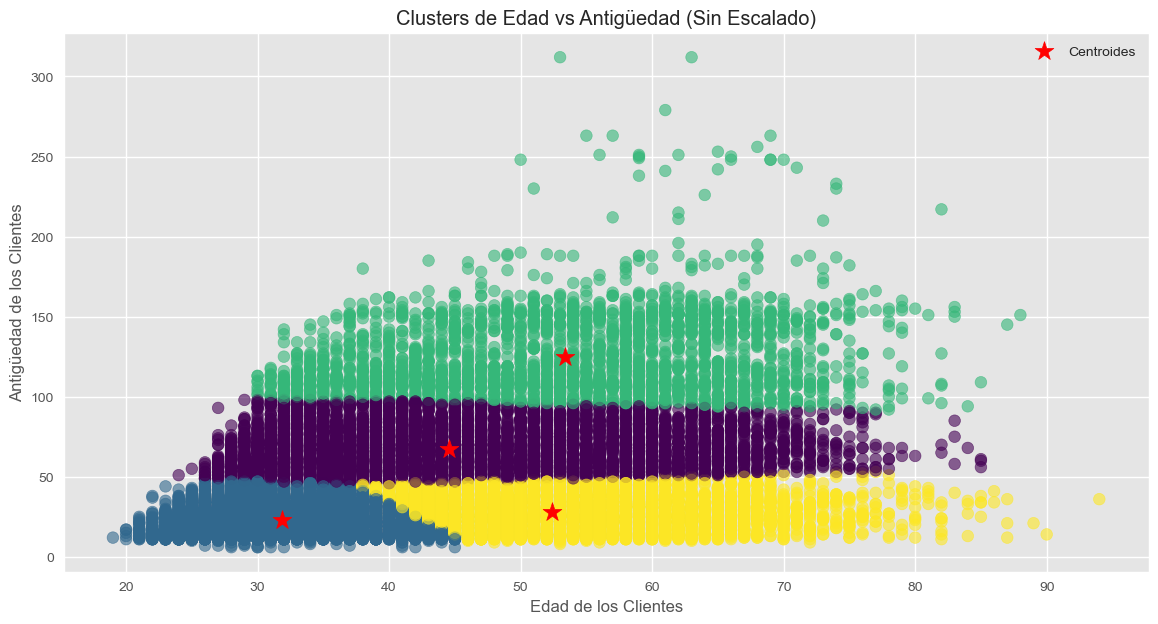

In [208]:
from sklearn.cluster import KMeans

# Selección de datos originales
X = df_modelo[["Edad", "Antiguedad"]].values

# Modelo con K=3 para iniciar
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Gráfico de clusters en 2D
plt.figure(figsize=(14, 7))
plt.scatter(df_modelo['Edad'], df_modelo['Antiguedad'], c=labels, cmap='viridis', s=70, alpha=0.6)
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    color='red', marker='*', s=200, label='Centroides'
)
plt.title("Clusters de Edad vs Antigüedad (Sin Escalado)")
plt.xlabel("Edad de los Clientes")
plt.ylabel("Antigüedad de los Clientes")
plt.legend()
plt.show()

Instalamos la libreria yellowbrick para graficar

In [78]:
! pip install yellowbrick

Preparamos los datos para graficar elbow y silhoutte

In [209]:
from sklearn import preprocessing

dataEs = preprocessing.Normalizer().fit_transform(X)

In [210]:
X = np.array(dfR[["Edad","Antiguedad"]])
X.shape

(15138, 2)

ahora calcularemos el numero optimo de cluster
* Elbow Method: Evalúa la disminución de la inercia.
* Silhouette Score: Mide la cohesión y separación de los clusters.

los combinaremos en un solo grafico con yellowbrick

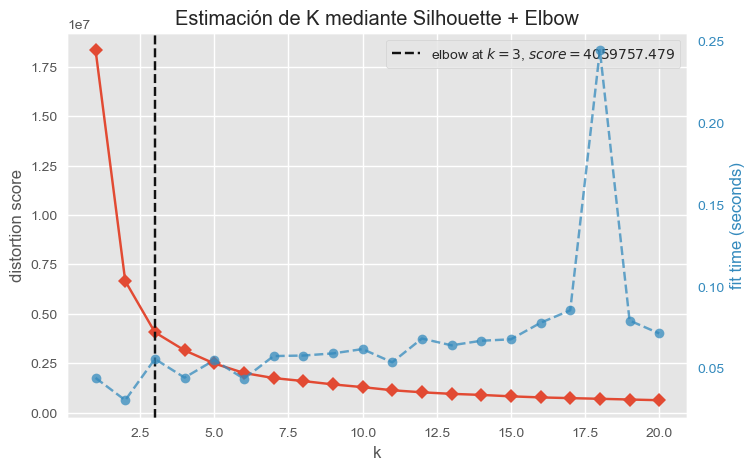

<Axes: title={'center': 'Estimación de K mediante Silhouette + Elbow'}, xlabel='k', ylabel='distortion score'>

In [224]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(random_state=42)

titulo = "Estimación de K mediante Silhouette + Elbow"
# Se crea el gráfico con la cantidad cluster desde 1 a 20

elb_visualizer = KElbowVisualizer(model, k=(1,21),size=(800, 500),title=titulo)
#Se entrena basándose en las variables independientes
elb_visualizer.fit(X)
elb_visualizer.show()

Como podemos ver gracias al gráfico mágico que logra unir a estos dos métodos estimamos cuál es el valor real de nuestros cluster el cual es 3. Este valor será usado en el siguiente paso para usarlo en la creación del gráfico K-Means que sería nuestro definitivo.

Ahora sabemos cuál es número de cluster correcto que es tres

In [225]:
# Entrenamiento del modelo con K=3 usando todo el DataFrame
X_full = df_modelo[["Edad", "Antiguedad"]].values
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_full)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Agregar etiquetas al dataframe original
df_modelo['Cluster'] = labels


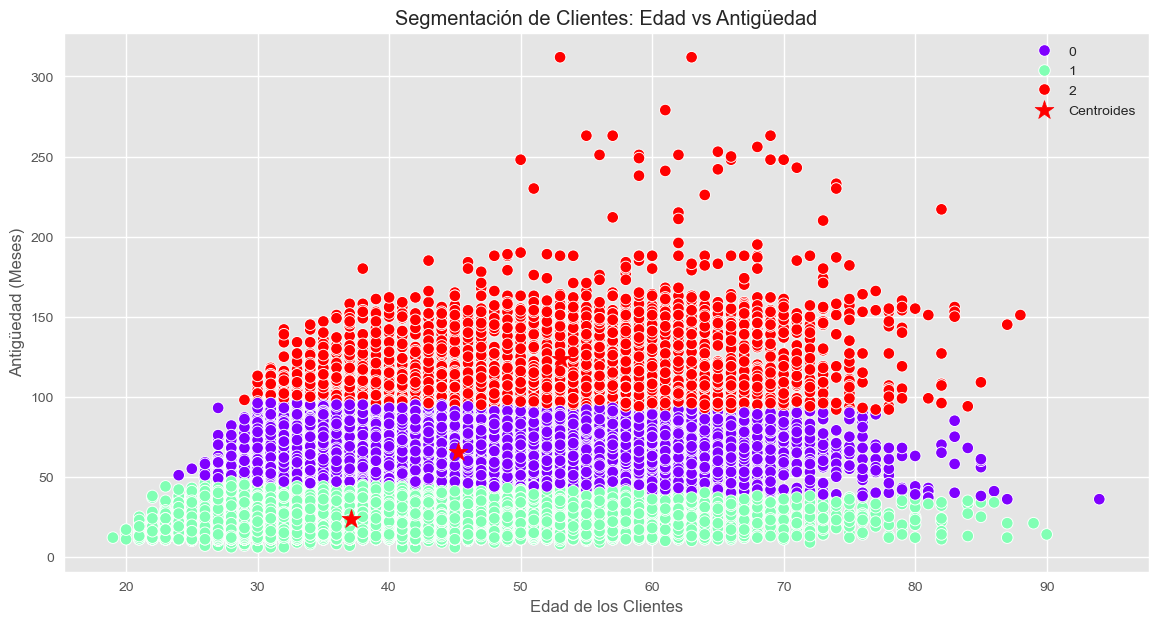

In [226]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df_modelo['Edad'], y=df_modelo['Antiguedad'], hue=df_modelo['Cluster'], palette='rainbow', s=70)
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    color='red', marker='*', s=200, label='Centroides'
)
plt.title("Segmentación de Clientes: Edad vs Antigüedad")
plt.xlabel("Edad de los Clientes")
plt.ylabel("Antigüedad (Meses)")
plt.legend()
plt.show()


ahora listamos las muestras más cercanas a los centroides de los clusters generados por el algoritmo K-means despues imprimos las características de esas muestras (en este caso, la edad y la antigüedad).


In [232]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
age=dfR['Edad'].values
ant=dfR['Antiguedad'].values
print('Muestra del Valor más cercano a los Centroides')
for row in closest:
  print('Edad: ',age[row],'Antiguedad en meses',ant[row])
  print('Edad: ',age[row],'Antiguedad en años',round(ant[row]/12),'y', round(ant[row]%12), 'meses')
  print('====================================================')


Muestra del Valor más cercano a los Centroides
Edad:  45 Antiguedad en meses 65
Edad:  45 Antiguedad en años 5 y 5 meses
Edad:  37 Antiguedad en meses 24
Edad:  37 Antiguedad en años 2 y 0 meses
Edad:  53 Antiguedad en meses 124
Edad:  53 Antiguedad en años 10 y 4 meses


Para saber que tratan de representar estos diferentes grupos se realizará la siguiente verificación

In [233]:
paleta_monopoly = ["Nuevos","Promedio","Antiguos"]

# Crear un nuevo DataFrame llamado copy
copy = pd.DataFrame()

# Copiamos los valores en cuanto edad y antigüedad
copy['Edad'] = dfR['Edad'].values
copy['Antiguedad'] = dfR['Antiguedad'].values

# Añadir las etiquetas de los clusters al DataFrame copy
copy['label'] = kmeans.predict(dfR[["Edad", "Antiguedad"]])

# Establecemos un data frame donde estará el conteo de cada uno de estos puntos
grupos = pd.DataFrame()
grupos['Color de Grupo'] = paleta_monopoly
# Se establece de forma manual el valor mas cercano del centroide
grupos['Cantidad'] = copy.groupby('label').size().values
grupos

c:\Users\sircr\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


Color de Grupo  Cantidad
0         Nuevos      3267
1       Promedio     10556
2       Antiguos      1315

Como conclusión final de nuestro modelo no supervisado de K-Means Clustering contamos con un total de tres grupos posibles para agrupar la Antigüedad de los Clientes relacionada con sus Edades se puede ver que a mayor edad de los clientes su antigüedad es mayor por ello vemos que su constante positiva.

Con esto podemos clasificar y recomendar que a los clientes con más antigüedad permitiendo hacer lo siguiente

* ayuda a diseñar campañas de marketing específicas para cada grupo de clientes, aumentando la efectividad y el retorno de la inversión.

* Permite dividir a los clientes en grupos homogéneos basados en características similares, lo que facilita la personalización de estrategias de marketing y ventas.

* Facilita la asignación eficiente de recursos (como el presupuesto de marketing) al enfocarse en los clusters más rentables o con mayor potencial de crecimiento.

# Modelo no supervisado 2 Hierarchical Clustering

Paso 1: Exploración Inicial de Datos

Primero, haremos una copia de nuestro dataframe con los datos limpios

Segundo, revisamos las variables principales del dataframe copia para analizar su distribución y propiedades.

In [ ]:
df_modelo_2= df_numeric.copy()

Paso 2: Visualización Inicial de la Relación entre Variables

Se crea un gráfico de dispersión para observar la relación entre la Renta y el CUPO_L1.

0             Renta       CUPO_L1
count  3.027500e+04  3.027500e+04
mean   6.191812e+05  1.254901e+06
std    2.762501e+05  1.009054e+06
min    1.000000e+00  0.000000e+00
25%    4.225380e+05  5.400000e+05
50%    5.670490e+05  1.000000e+06
75%    7.975630e+05  1.655750e+06
max    1.406830e+06  1.740000e+07


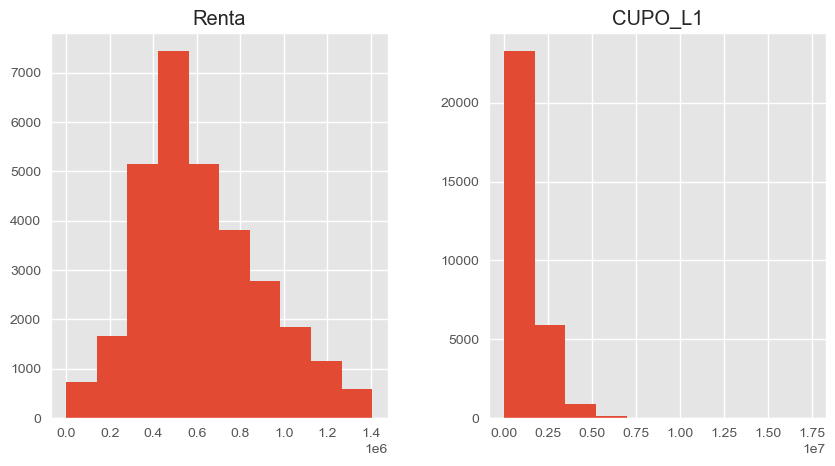

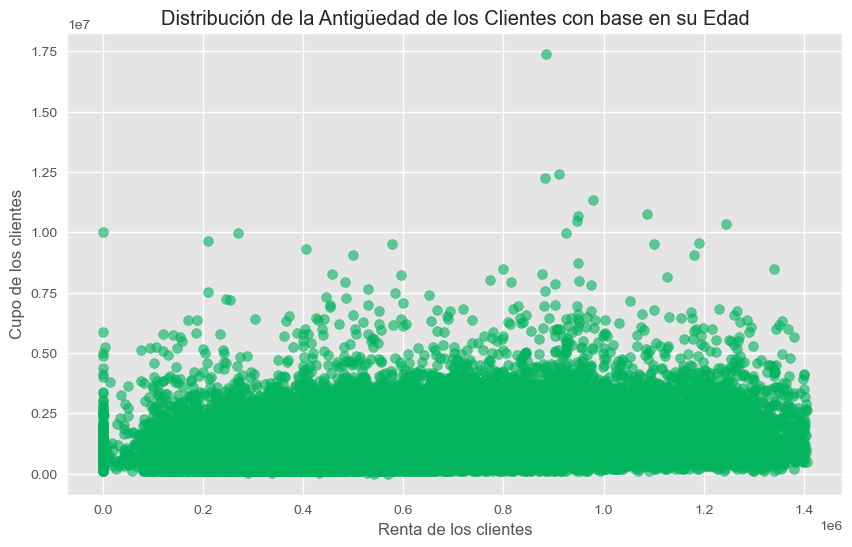

In [273]:
print(df_modelo_2[['Renta', 'CUPO_L1']].describe())
df_modelo_2[['Renta', 'CUPO_L1']].hist(figsize=(10, 5))
plt.show()

# Gráfico de dispersión inicial
plt.figure(figsize=(10, 6))
plt.scatter(df_modelo_2['Renta'], df_modelo_2['CUPO_L1'], alpha=0.6, color='#02b45d')
plt.xlabel("Renta de los clientes")
plt.ylabel("Cupo de los clientes")
plt.title("Distribución de la Antigüedad de los Clientes con base en su Edad")
plt.show()

Paso 3: Selección de Datos y Preprocesamiento

Seleccionar las Variables y Tomar una Muestra

Trabajamos con las variables de interés y reducimos el dataset al 50% de los datos para acelerar el cálculo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Seleccionar las variables de interés
data = df_modelo_2[['Renta', 'CUPO_L1']]

# Tomar una muestra del 50% de los datos
data_sample, _ = train_test_split(data, test_size=0.5, random_state=42)



Escalar las Variables

Usamos StandardScaler para estandarizar los datos y eliminar posibles sesgos debido a escalas diferentes.

In [ ]:
# Escalar las variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sample)

Paso 4: Construcción del Modelo Jerárquico

Se utiliza el método Ward para construir el dendrograma y observar la estructura de clusters.

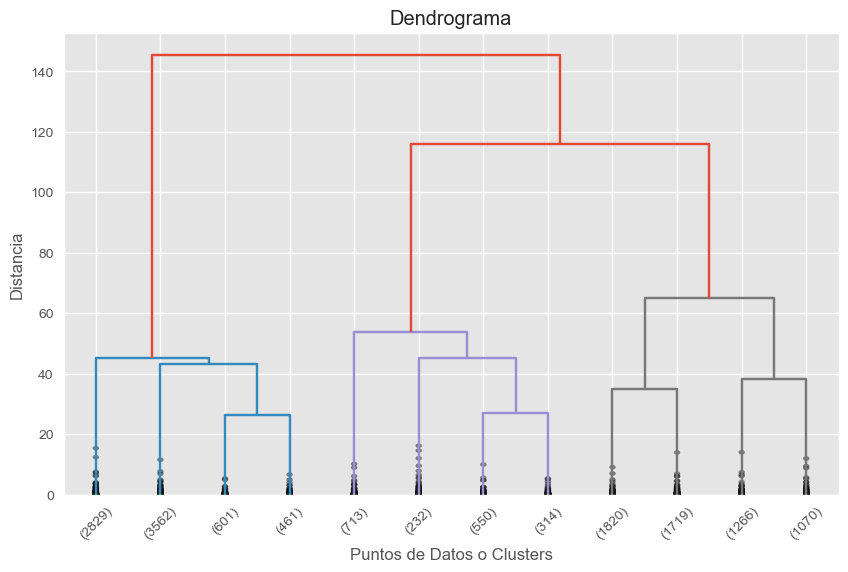

In [275]:
# Construir el linkage matrix
linkage_matrix = linkage(data_scaled, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title('Dendrograma')
plt.xlabel('Puntos de Datos o Clusters')
plt.ylabel('Distancia')
plt.show()


Paso 5: Determinar el Número Óptimo de Clusters

Utilizamos el coeficiente de silueta para identificar el número ideal de clusters.

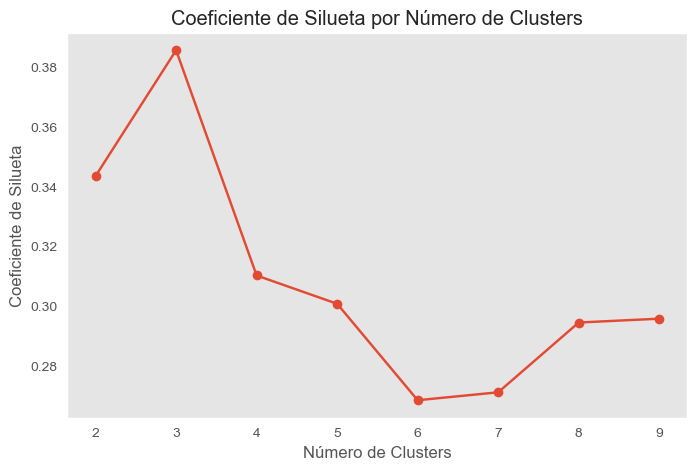

In [264]:
from sklearn.metrics import silhouette_score

# Rango de clusters para probar
cluster_range = range(2, 10)

silhouette_scores = []
for n_clusters in cluster_range:
    # Crear clusters con fcluster
    cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # Calcular coeficiente de silueta
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el coeficiente de silueta
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta por Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.grid()
plt.show()


Como podemos ver en el grafico se muestra que 3 es el numero ideal de cluster y si le agregaramos mas cluster el redimiento del modelo decaeria 

Paso 6: Aplicación del Modelo con 3 Clusters

Generar Etiquetas de Clusters

In [278]:
# Definir el número de clusters
n_clusters = 3

# Crear etiquetas de cluster
cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Agregar los clusters al DataFrame
data_sample_with_clusters = pd.DataFrame(data_sample, columns=['Renta', 'CUPO_L1'])
data_sample_with_clusters['Cluster'] = cluster_labels


Visualizar los Clusters

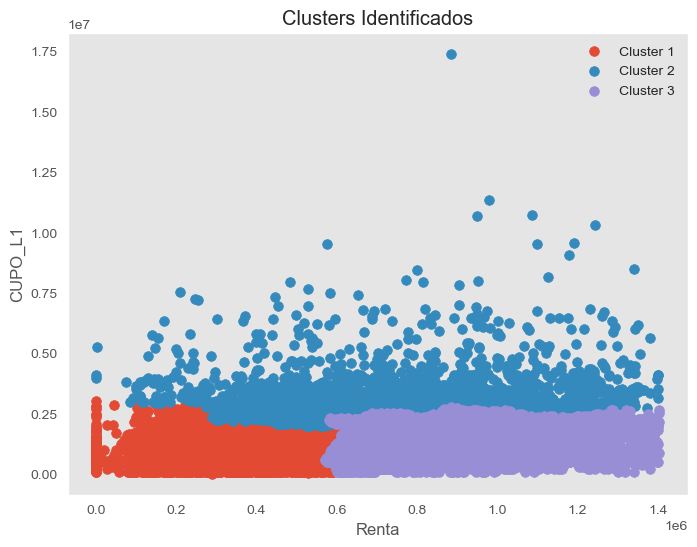

In [279]:
# Graficar los clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(cluster_labels):
    plt.scatter(
        data_sample_with_clusters[data_sample_with_clusters['Cluster'] == cluster]['Renta'],
        data_sample_with_clusters[data_sample_with_clusters['Cluster'] == cluster]['CUPO_L1'],
        label=f'Cluster {cluster}'
    )
    
plt.title('Clusters Identificados')
plt.xlabel('Renta')
plt.ylabel('CUPO_L1')
plt.legend()
plt.grid()
plt.show()


Paso 7: Evaluación del Modelo

Calculamos el coeficiente de silueta final y resumimos las características de cada cluster.

In [280]:
# Calcular coeficiente de silueta final
final_silhouette = silhouette_score(data_scaled, cluster_labels)
print(f"Coeficiente de Silueta Final: {final_silhouette:.2f}")


Coeficiente de Silueta Final: 0.39


In [249]:
# Agrupar por cluster y calcular estadísticas descriptivas
cluster_summary = data_sample_with_clusters.groupby('Cluster').agg({
    'Renta': ['mean', 'median', 'std', 'min', 'max'],
    'CUPO_L1': ['mean', 'median', 'std', 'min', 'max']
}).round(2)

print("Resumen de Clusters:")
print(cluster_summary)



Resumen de Clusters:
             Renta                                           CUPO_L1  \
              mean    median        std     min      max        mean   
Cluster                                                                
1        411034.98  429416.0  127434.43       1   639978   851736.15   
2        728966.84  692252.0  292123.86       1  1401482  3345527.53   
3        848915.78  804505.0  195081.80  570004  1404393  1122427.89   

                                                   
            median         std      min       max  
Cluster                                            
1         750000.0   529293.43    20000   3033500  
2        3071540.0  1155469.46  1990300  17400000  
3        1000000.0   621343.94   100000   2764040  


Paso 8: Asignar Etiquetas Interpretativas

Asignamos nombres interpretativos a cada cluster según su comportamiento.

In [255]:
# Asignar etiquetas interpretativas
cluster_labels = {
    1: "Clientes Premium",
    2: "Clientes Modestos",
    3: "Clientes Intermedios"
}

data_sample_with_clusters['Cluster_Label'] = data_sample_with_clusters['Cluster'].map(cluster_labels)

# Ver los primeros resultados
print(data_sample_with_clusters.head())


        Renta  CUPO_L1  Cluster         Cluster_Label
17067  500000  2870000        2     Clientes Modestos
13437  400000  2518800        2     Clientes Modestos
44536  186000   500000        1      Clientes Premium
26646  582801  1000000        1      Clientes Premium
36112  703532  1960000        3  Clientes Intermedios


Paso 9: Analizar la Distribución de los Clusters

Visualizamos cuántos clientes pertenecen a cada cluster.

Distribución de Clusters:
Cluster_Label
Clientes Premium        7453
Clientes Intermedios    5875
Clientes Modestos       1809
Name: count, dtype: int64


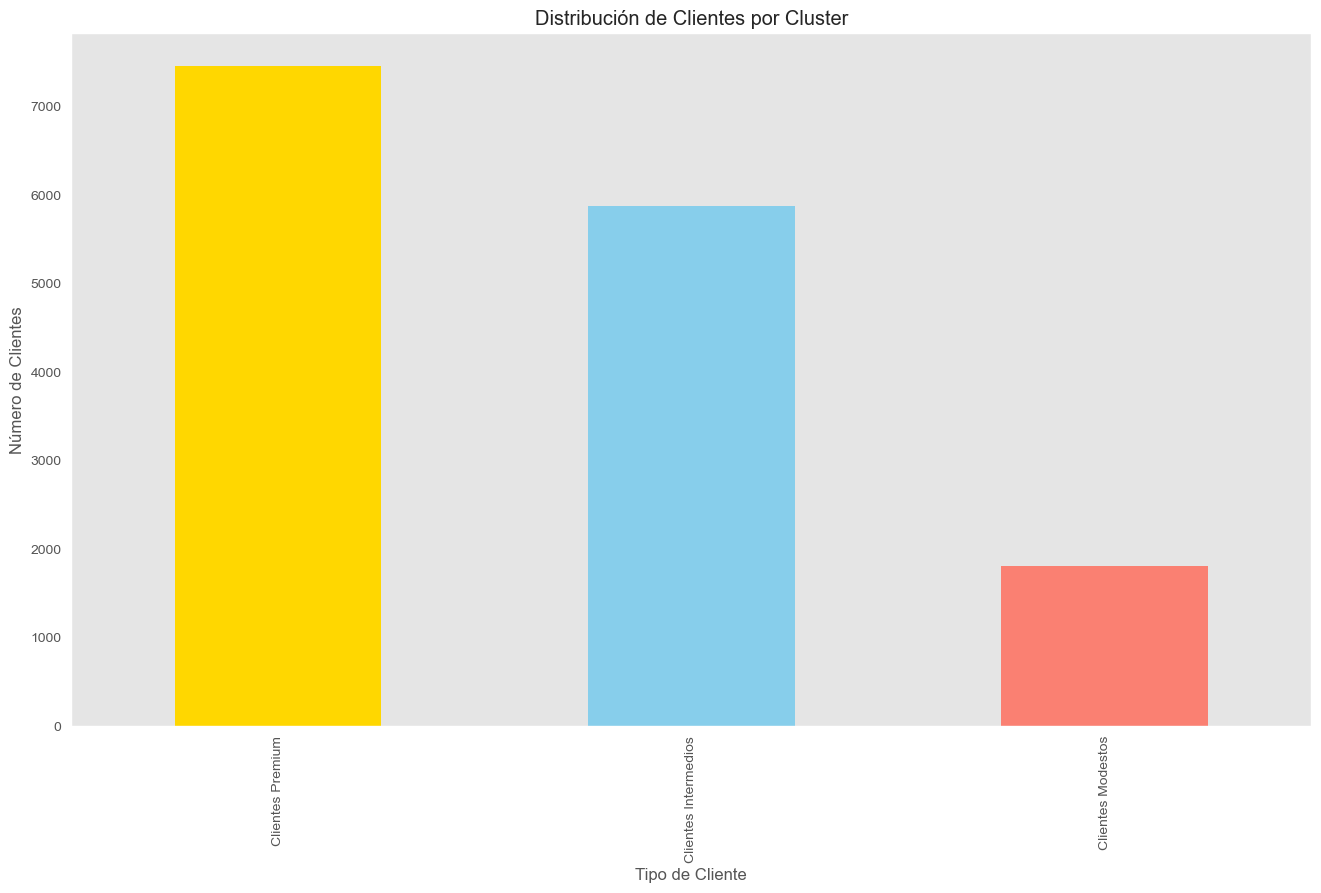

In [ ]:
# Contar elementos en cada cluster
cluster_distribution = data_sample_with_clusters['Cluster_Label'].value_counts()
print("Distribución de Clusters:")
print(cluster_distribution)

# Grafico distribución
cluster_distribution.plot(kind='bar', color=['gold', 'skyblue', 'salmon'])
plt.title('Distribución de Clientes por Cluster')
plt.ylabel('Número de Clientes')
plt.xlabel('Tipo de Cliente')
plt.grid()
plt.show()


Paso 10: Visualización Final

Creamos una visualización final para observar los clusters en el espacio de Renta y CUPO_L1.

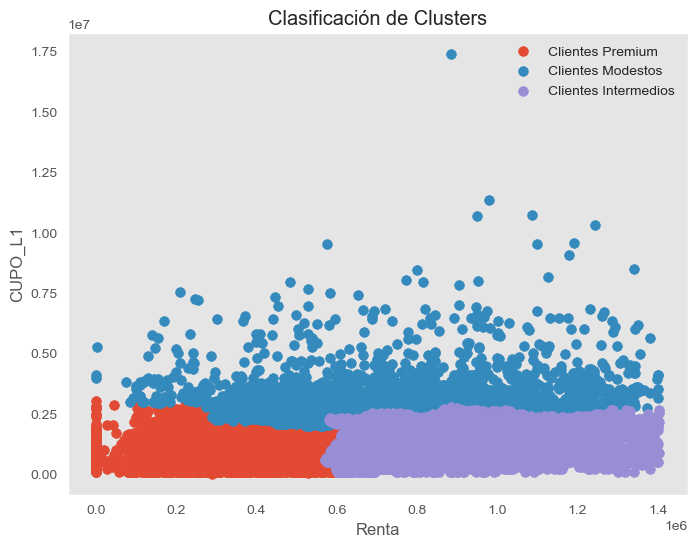

In [254]:
plt.figure(figsize=(8, 6))
for label in cluster_labels.values():
    subset = data_sample_with_clusters[data_sample_with_clusters['Cluster_Label'] == label]
    plt.scatter(subset['Renta'], subset['CUPO_L1'], label=label)

plt.title('Clasificación de Clusters')
plt.xlabel('Renta')
plt.ylabel('CUPO_L1')
plt.legend()
plt.grid()
plt.show()



In [262]:
# Contar clientes en cada cluster
cluster_counts = data_sample_with_clusters['Cluster_Label'].value_counts()
print(cluster_counts)


Cluster_Label
Clientes Conservadores Premium       7453
Clientes Altamente Activos           5875
Clientes Dependientes del Crédito    1809
Name: count, dtype: int64


Conclusión

El coeficiente de silueta final fue 0.39, indicando una separación moderada entre los clusters.

Las etiquetas asignadas a los clusters ayudan a interpretar su comportamiento:

Clientes Premium: Altos ingresos, uso moderado del crédito.

Clientes Modestos: Bajos ingresos, alta dependencia del crédito.

Clientes Intermedios: Ingresos y crédito balanceados.

Este análisis puede ser útil para estrategias de marketing y personalización de productos financieros.


# Conclusion final

*   En este análisis, trabajé con dos técnicas de clustering: Hierarchical Clustering y K-Means Clustering, ambas utilizadas para identificar patrones y segmentar los datos en grupos homogéneos. El objetivo principal fue analizar la base de datos del banco Monopoly para clasificar a sus clientes y proponer estrategias específicas según los resultados.

*   Con el modelo de K-Means Clustering, seleccioné las variables Edad y Antigüedad. Usando los métodos de Elbow y Silhouette, determiné que tres clusters eran óptimos. Esto quedó respaldado por visualizaciones que muestran cómo se agrupan los clientes en función de estas características. Los centroides de los clusters ayudaron a interpretar cada grupo, destacando patrones claros en la relación entre la edad y la antigüedad.

*   Por otro lado, el análisis con Hierarchical Clustering fue útil para entender cómo los datos se agrupan de forma progresiva, mostrando relaciones jerárquicas a través del dendrograma. Este método permitió identificar estructuras más detalladas dentro de los datos, brindando una visión más global de las conexiones entre los clientes.

*   Finalmente, logré segmentar a los diferentes tipos de clientes que posee el banco Monopoly, lo que permite implementar estrategias diferenciadas para cada grupo. Aunque ambos métodos son útiles y complementarios, elegiría Hierarchical Clustering porque proporciona mayor claridad en las relaciones entre los datos y facilita la toma de decisiones, permitiendo alcanzar los objetivos propuestos al cominezo de este analisis.

